# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


#Tener todo en un csv para trabajar desde aqui

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc
!pip install category_encoders


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leer el df de un archivo
ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD_version2.csv'
df_unidoLDG = pd.read_csv(ruta_archivo)

In [ ]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG.head())

,rol,categoria_dominio_correo,opened,clicked,Correo de marketing ID,tiene_numero_celular,tiene_linkedin,base_SEXO,base_año nac,base_ESTADONACIMIENTO,base_exatec personalizado,base_ESTADO_RESIDENCIA,base_PAIS_RESIDENCIA,base_AñoGrad,base_Tipo Escuela,base_SIGLASDELPROGRAMA,base_NIVELACADEMICO,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,ha_actualizado_teléfono,HizoPrepaTec,suscrito_FechaRegistro,evento_Campus,evento_Category,evento_CheckedIn,evento_attendeeStatus,es_LDGincubadora,es_Voluntariado,es_HistoriaExito,es_Talks,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro
0,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,LAE,5,A,Monterrey,Educación,Mexicana,0,I,1,0,2024-06-07 17:23:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0,0,0,0,6954,10578,6954,104
1,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,LAE,5,A,Monterrey,Educación,Mexicana,0,I,1,0,2024-06-07 17:23:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0,0,0,0,6954,10578,6954,104
2,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470
3,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470
4,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,MA,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470


In [ ]:
df_unidoLDG['base_SIGLASDELPROGRAMA']

,base_SIGLASDELPROGRAMA
0,LAE
1,LAE
2,MA
3,MA
4,MA
...,...
71180,ITC
71181,ITC
71182,ITC
71183,ITC


In [ ]:
num_categorias = df_unidoLDG['base_SIGLASDELPROGRAMA'].nunique()
display(f"Número de categorías únicas: {num_categorias}")

'Número de categorías únicas: 180'

In [ ]:
from category_encoders import TargetEncoder
# Aplicar Target Encoding para cada variable objetivo por separado
encoder1 = TargetEncoder(cols=['base_SIGLASDELPROGRAMA'])
df_unidoLDG['base_SIGLASDELPROGRAMA_encoded_HistoriaExito'] = encoder1.fit_transform(df_unidoLDG['base_SIGLASDELPROGRAMA'], df_unidoLDG['es_HistoriaExito'])

encoder2 = TargetEncoder(cols=['base_SIGLASDELPROGRAMA'])
df_unidoLDG['base_SIGLASDELPROGRAMA_encoded_LDGincubadora'] = encoder2.fit_transform(df_unidoLDG['base_SIGLASDELPROGRAMA'], df_unidoLDG['es_LDGincubadora'])

encoder3 = TargetEncoder(cols=['base_SIGLASDELPROGRAMA'])
df_unidoLDG['base_SIGLASDELPROGRAMA_encoded_Voluntariado'] = encoder3.fit_transform(df_unidoLDG['base_SIGLASDELPROGRAMA'], df_unidoLDG['es_Voluntariado'])


In [ ]:
# Eliminar la columna base_SIGLASDELPROGRAMA
df_unidoLDG.drop(columns=['base_SIGLASDELPROGRAMA'], inplace=True)

# Verificar que la columna ha sido eliminada
display(df_unidoLDG.head())


,rol,categoria_dominio_correo,opened,clicked,Correo de marketing ID,tiene_numero_celular,tiene_linkedin,base_SEXO,base_año nac,base_ESTADONACIMIENTO,base_exatec personalizado,base_ESTADO_RESIDENCIA,base_PAIS_RESIDENCIA,base_AñoGrad,base_Tipo Escuela,base_NIVELACADEMICO,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,ha_actualizado_teléfono,HizoPrepaTec,suscrito_FechaRegistro,evento_Campus,evento_Category,evento_CheckedIn,evento_attendeeStatus,es_LDGincubadora,es_Voluntariado,es_HistoriaExito,es_Talks,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro,base_SIGLASDELPROGRAMA_encoded_HistoriaExito,base_SIGLASDELPROGRAMA_encoded_LDGincubadora,base_SIGLASDELPROGRAMA_encoded_Voluntariado
0,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,5,A,Monterrey,Educación,Mexicana,0,I,1,0,2024-06-07 17:23:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0,0,0,0,6954,10578,6954,104,0.002011,0.294670,0.207844
1,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,indefinido,Sí,Nuevo León,Mexico,1967,Negocios,5,A,Monterrey,Educación,Mexicana,0,I,1,0,2024-06-07 17:23:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Registered,0,0,0,0,6954,10578,6954,104,0.002011,0.294670,0.207844
2,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470,0.012131,0.028644,0.033024
3,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470,0.012131,0.028644,0.033024
4,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Edomex,Sí,ciudad de mexico,Mexico,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,2020-09-10 14:25:00,TEC Campus Monterrey,Egresados - Regreso a Casa,False,Accepted,0,0,0,0,2555,7864,2555,1470,0.012131,0.028644,0.033024


##Revisar correlación para columnas posiblemente redundantes

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar las variables
le = LabelEncoder()
df_unidoLDG['base_ESTADONACIMIENTO_encoded'] = le.fit_transform(df_unidoLDG['base_ESTADONACIMIENTO'])
df_unidoLDG['base_ESTADO_RESIDENCIA_encoded'] = le.fit_transform(df_unidoLDG['base_ESTADO_RESIDENCIA'])

# Calcular la correlación de Pearson
correlacion = df_unidoLDG[['base_ESTADONACIMIENTO_encoded', 'base_ESTADO_RESIDENCIA_encoded']].corr(method='pearson')
display("Correlación de Pearson entre base_ESTADONACIMIENTO y base_ESTADO_RESIDENCIA:")
display(correlacion)


'Correlación de Pearson entre base_ESTADONACIMIENTO y base_ESTADO_RESIDENCIA:'

,base_ESTADONACIMIENTO_encoded,base_ESTADO_RESIDENCIA_encoded
base_ESTADONACIMIENTO_encoded,1.000000,0.363372
base_ESTADO_RESIDENCIA_encoded,0.363372,1.000000


In [ ]:
# Codificar las variables
le = LabelEncoder()
df_unidoLDG['base_campusoperacion_encoded'] = le.fit_transform(df_unidoLDG['base_campusoperación'])
df_unidoLDG['ID_CAMPUS_encoded'] = le.fit_transform(df_unidoLDG['base_IDCAMPUS'])

# Calcular la correlación de Pearson
correlacion = df_unidoLDG[['base_campusoperacion_encoded', 'ID_CAMPUS_encoded']].corr(method='pearson')
display("Correlación de Pearson entre base_campusoperacion y ID_CAMPUS:")
display(correlacion)


'Correlación de Pearson entre base_campusoperacion y ID_CAMPUS:'

,base_campusoperacion_encoded,ID_CAMPUS_encoded
base_campusoperacion_encoded,1.00000,-0.27779
ID_CAMPUS_encoded,-0.27779,1.00000


In [ ]:
# Eliminar las variables creadas
df_unidoLDG = df_unidoLDG.drop(columns=['base_ESTADONACIMIENTO_encoded', 'base_ESTADO_RESIDENCIA_encoded', 'base_campusoperacion_encoded'])


Son datos distintos, por ello se mantendrá

In [ ]:
# Ver valores únicos, sus frecuencias, y la sumatoria total para cada variable agrupada

# Para base_ESTADO_RESIDENCIA_agrupado
display("Valores únicos y frecuencias en 'base_ESTADO_RESIDENCIA':")
display(df_unidoLDG['base_ESTADO_RESIDENCIA'].value_counts())
display(f"Actualmente cuenta con {df_unidoLDG['base_ESTADO_RESIDENCIA'].nunique()} valores distintos y {df_unidoLDG['base_ESTADO_RESIDENCIA'].notna().sum()} renglones con información.")

# Para base_ESTADONACIMIENTO_agrupado
display("Valores únicos y frecuencias en 'base_ESTADONACIMIENTO':")
display(df_unidoLDG['base_ESTADONACIMIENTO'].value_counts())
display(f"Actualmente cuenta con {df_unidoLDG['base_ESTADONACIMIENTO'].nunique()} valores distintos y {df_unidoLDG['base_ESTADONACIMIENTO'].notna().sum()} renglones con información.")

# Para base_PAIS_RESIDENCIA_agrupado
display("Valores únicos y frecuencias en 'base_PAIS_RESIDENCIA':")
display(df_unidoLDG['base_PAIS_RESIDENCIA'].value_counts())
display(f"Actualmente cuenta con {df_unidoLDG['base_PAIS_RESIDENCIA'].nunique()} valores distintos y {df_unidoLDG['base_PAIS_RESIDENCIA'].notna().sum()} renglones con información.")


"Valores únicos y frecuencias en 'base_ESTADO_RESIDENCIA':"

,count
base_ESTADO_RESIDENCIA,
Nuevo León,38282
ciudad de mexico,7944
jalisco,5427
coahuila,4107
California,2244
Edomex,1282
hidalgo,1050
tamaulipas,1032
Querétaro,868


'Actualmente cuenta con 54 valores distintos y 70703 renglones con información.'

"Valores únicos y frecuencias en 'base_ESTADONACIMIENTO':"

,count
base_ESTADONACIMIENTO,
Nuevo León,24732
ciudad de mexico,11973
coahuila de zaragoza,4978
jalisco,3502
Veracruz de Ignacio de la Llave,3205
oaxaca,2528
tamaulipas,2488
Edomex,2141
sonora,2002


'Actualmente cuenta con 55 valores distintos y 71175 renglones con información.'

"Valores únicos y frecuencias en 'base_PAIS_RESIDENCIA':"

,count
base_PAIS_RESIDENCIA,
Mexico,67774
United States,3133
Spain,54
Guatemala,42
Luxembourg,40
United Kingdom,36
Peru,32
Chile,31
El Salvador,10


'Actualmente cuenta con 18 valores distintos y 71185 renglones con información.'

##Agrupar manteniendo el 80% de la información y el 20% restante en "otros"

In [ ]:
# Función para agrupar en "Otros" basado en frecuencia acumulada correctamente
def agrupar_frecuencia(df, columna, umbral=0.8):
    # Calcular la frecuencia relativa de cada categoría
    frecuencia = df[columna].value_counts(normalize=True)

    # Identificar las categorías principales que juntas suman el 80% o más
    frecuencia_acumulada = frecuencia.cumsum()
    categorias_principales = frecuencia[frecuencia_acumulada <= umbral].index

    # Agregar la categoría adicional que supera el umbral, si corresponde
    if frecuencia_acumulada.iloc[len(categorias_principales)] <= umbral:
        categorias_principales = frecuencia[frecuencia_acumulada <= umbral].index

    # Reemplazar las categorías menos frecuentes por "Otros"
    df[f'{columna}_agrupado'] = df[columna].apply(lambda x: x if x in categorias_principales else 'Otros')

    return df

# Aplicar la función a cada columna
df_unidoLDG = agrupar_frecuencia(df_unidoLDG, 'base_ESTADO_RESIDENCIA')
df_unidoLDG = agrupar_frecuencia(df_unidoLDG, 'base_ESTADONACIMIENTO')

# Verificar el resultado de cada variable agrupada
display("Valores únicos y frecuencias en 'base_ESTADO_RESIDENCIA_agrupado':")
display(df_unidoLDG['base_ESTADO_RESIDENCIA_agrupado'].value_counts())

display("Valores únicos y frecuencias en 'base_ESTADONACIMIENTO_agrupado':")
display(df_unidoLDG['base_ESTADONACIMIENTO_agrupado'].value_counts())



"Valores únicos y frecuencias en 'base_ESTADO_RESIDENCIA_agrupado':"

,count
base_ESTADO_RESIDENCIA_agrupado,
Nuevo León,38282
Otros,15425
ciudad de mexico,7944
jalisco,5427
coahuila,4107


"Valores únicos y frecuencias en 'base_ESTADONACIMIENTO_agrupado':"

,count
base_ESTADONACIMIENTO_agrupado,
Nuevo León,24732
Otros,15638
ciudad de mexico,11973
coahuila de zaragoza,4978
jalisco,3502
Veracruz de Ignacio de la Llave,3205
oaxaca,2528
tamaulipas,2488
Edomex,2141


Si bien la alta cardinalidad suele ser el principal motivador para la agrupación, en este caso el enfoque 80-20 es adecuado y justificado, dado que permite reducir ruido, mejorar la eficiencia y mantener la representatividad de los datos clave.

Además, en consulta con el área de EXATEC, se sugirió aplicar la regla de Pareto, enfocándonos en los estados que representan el 80% de los valores, ya que estos estados concentran la mayor proporción de egresados y, por lo tanto, presentan patrones más consistentes y relevantes. Esto permite maximizar el impacto de las estrategias dirigidas, pues los estados que concentran la mayor cantidad de EXATEC son también los que ofrecen mayor retorno en términos de campañas de comunicación y análisis de comportamiento.

Al limitar la granularidad a las categorías más representativas, el modelo puede enfocarse en las tendencias principales sin el ruido que aportan categorías de baja frecuencia. Esto, en conjunto, facilita la implementación de campañas focalizadas para los principales grupos, al tiempo que permite abordar de manera general a aquellos egresados en estados de menor frecuencia, sin comprometer la eficacia o precisión del modelo.

In [ ]:
# Función ajustada para base_PAIS_RESIDENCIA
def agrupar_frecuencia_pais(df, columna, umbral=0.8):
    # Calcular la frecuencia relativa de cada categoría
    frecuencia = df[columna].value_counts(normalize=True)

    # Si el primer valor representa más del umbral, retener solo ese valor
    if frecuencia.iloc[0] >= umbral:
        categorias_principales = [frecuencia.index[0]]
    else:
        # Calcular la frecuencia acumulada para identificar las categorías principales
        frecuencia_acumulada = frecuencia.cumsum()
        categorias_principales = frecuencia[frecuencia_acumulada <= umbral].index

    # Reemplazar las categorías menos frecuentes por "Otros"
    df[f'{columna}_agrupado'] = df[columna].apply(lambda x: x if x in categorias_principales else 'Otros')

    return df

# Aplicar la función ajustada solo a base_PAIS_RESIDENCIA
df_unidoLDG = agrupar_frecuencia_pais(df_unidoLDG, 'base_PAIS_RESIDENCIA')

# Verificar el resultado
display("Valores únicos y frecuencias en 'base_PAIS_RESIDENCIA_agrupado':")
display(df_unidoLDG['base_PAIS_RESIDENCIA_agrupado'].value_counts())


"Valores únicos y frecuencias en 'base_PAIS_RESIDENCIA_agrupado':"

,count
base_PAIS_RESIDENCIA_agrupado,
Mexico,67774
Otros,3411


Al analizar los datos, observamos que el 95.21% de los EXATEC residen en México, mientras que el resto se encuentra distribuido en varios países. Tras discutir estos resultados con el área de EXATEC, decidimos agrupar las categorías de residencia en 'México' y 'Otros'. Dado que el TEC es una universidad mexicana, las estrategias y campañas estarán dirigidas principalmente a los EXATEC que residen en México, con un enfoque diferenciado y más general para aquellos que viven fuera del país. Este enfoque se basa en que los egresados en el extranjero representan menos del 4.79% del total, lo que permite segmentar de manera eficiente las comunicaciones y campañas para ambos grupos.

In [ ]:
# Eliminar las variables originales
df_unidoLDG = df_unidoLDG.drop(columns=['base_PAIS_RESIDENCIA', 'base_ESTADONACIMIENTO', 'base_ESTADO_RESIDENCIA'])

##Separación de tipo de variables

In [ ]:
# Seleccionar y mostrar tres columnas específicas del DataFrame
display(df_unidoLDG[['es_HistoriaExito', 'es_LDGincubadora', 'es_Voluntariado']])


,es_HistoriaExito,es_LDGincubadora,es_Voluntariado
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
71180,0,0,0
71181,0,0,0
71182,0,0,0
71183,0,0,0


##Revisar Nans

In [ ]:
# Contar los valores NaN en cada columna del DataFrame
nans_por_columna = df_unidoLDG.isna().sum()

# Mostrar las columnas con valores NaN y su cantidad
display("Cantidad de NaNs por columna en el DataFrame:")
display(nans_por_columna[nans_por_columna > 0])


'Cantidad de NaNs por columna en el DataFrame:'

,0


##Análisis de variables categóricas

Anteriormente, para las variables categóricas, decidimos reemplazar los valores NaN con la moda. Sin embargo, aunque base_AREAORGANIZACIONAL es una variable categórica, la moda resultó ser 0, un valor que no aporta información relevante. Por esta razón, se recalculó la moda, ignorando los valores 0, y luego se usó este nuevo valor de moda para reemplazar los NaN en la columna.

In [ ]:
# Calcular la moda de la columna 'base_AREAORGANIZACIONAL' excluyendo los valores 0 o '0'
moda_base_AREAORGANIZACIONAL = df_unidoLDG.loc[(df_unidoLDG['base_AREAORGANIZACIONAL'] != 0) &
                                               (df_unidoLDG['base_AREAORGANIZACIONAL'] != '0'),
                                               'base_AREAORGANIZACIONAL'].mode()[0]

# Reemplazar NaN, 0 (enteros) y '0' (cadenas) por la moda calculada
df_unidoLDG['base_AREAORGANIZACIONAL'] = df_unidoLDG['base_AREAORGANIZACIONAL'].replace([0, '0', pd.NA, None], moda_base_AREAORGANIZACIONAL)
df_unidoLDG['base_AREAORGANIZACIONAL'].fillna(moda_base_AREAORGANIZACIONAL, inplace=True)  # Para valores NaN remanentes

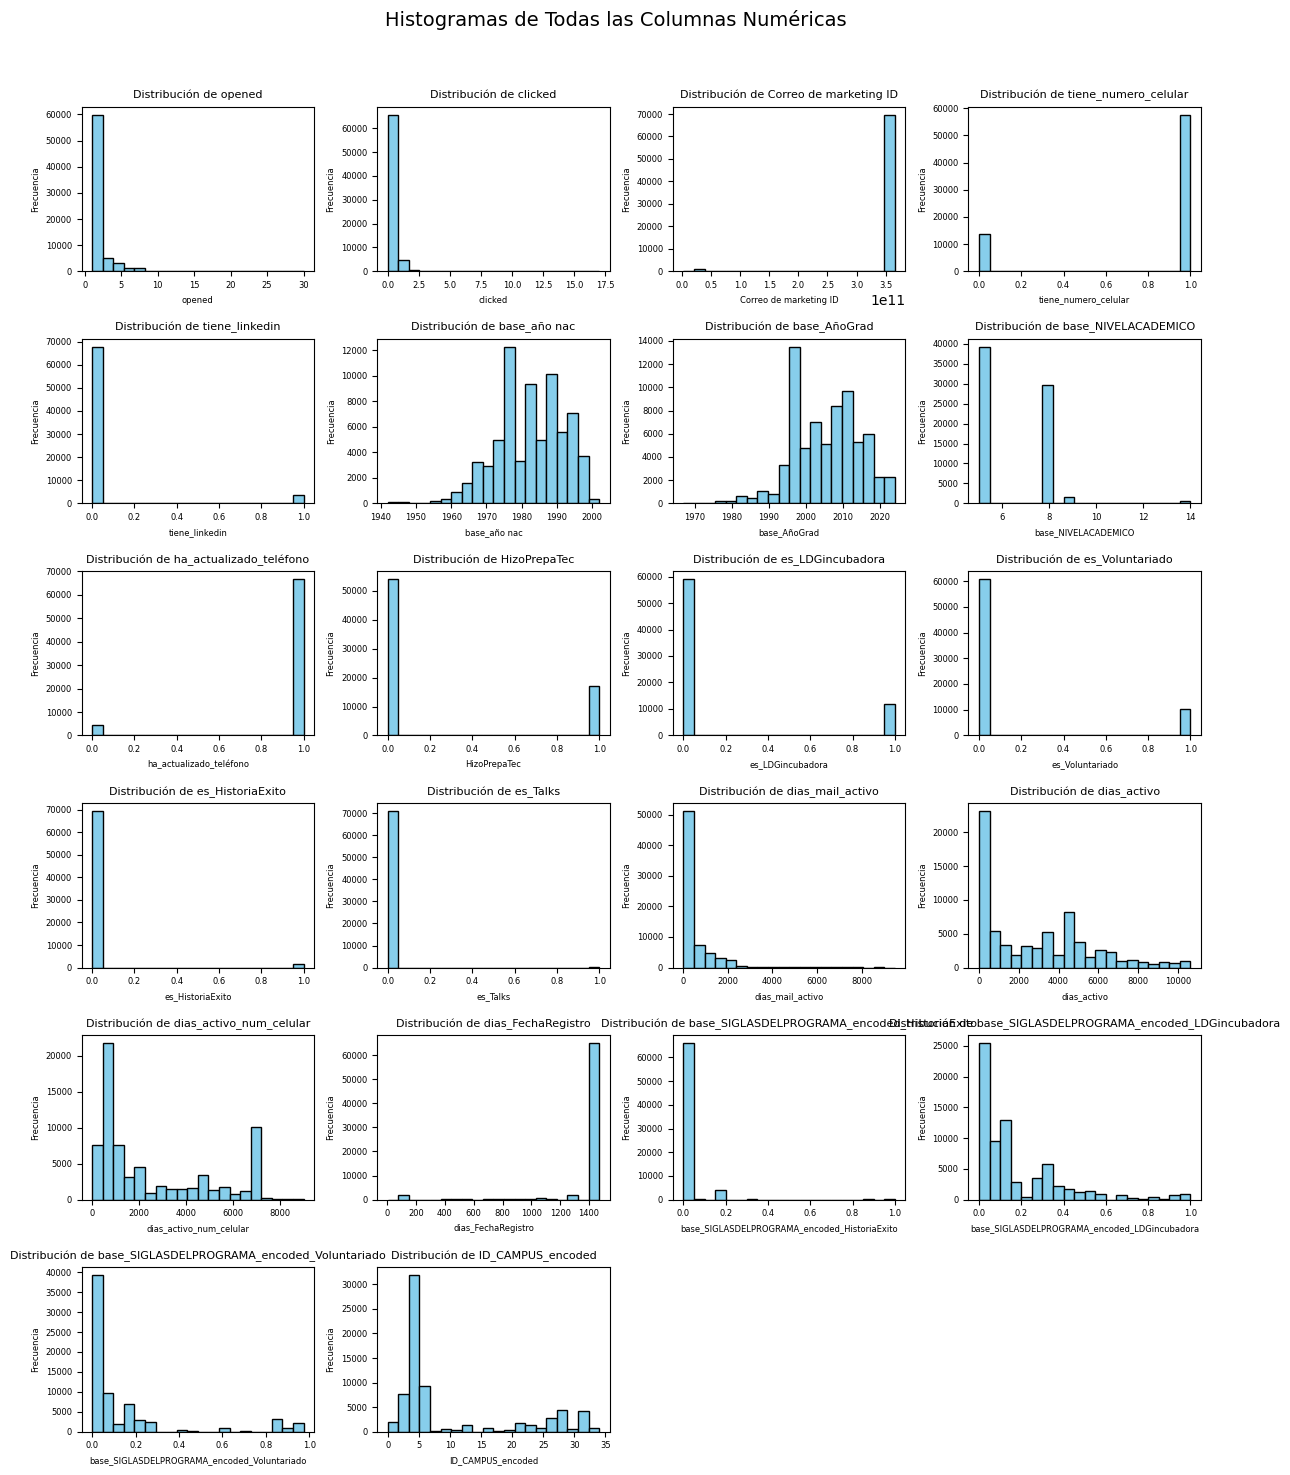

In [ ]:
import matplotlib.pyplot as plt
import math

# Filtrar solo las columnas numéricas
df_numerico = df_unidoLDG.select_dtypes(include=['number'])
columnas_numericas = df_numerico.columns

# Configurar el número de filas y columnas en la cuadrícula de subplots
n_columnas = len(columnas_numericas)
n_filas = math.ceil(n_columnas / 4)  # 4 gráficos por fila, ajusta según prefieras

# Configurar el tamaño de la figura (más reducido)
fig, axes = plt.subplots(nrows=n_filas, ncols=4, figsize=(12, n_filas * 2.5))  # Ajusta el figsize aquí

fig.suptitle('Histogramas de Todas las Columnas Numéricas', fontsize=14)  # Reduce la fuente del título principal

# Crear un histograma para cada columna numérica
for ax, col in zip(axes.flatten(), columnas_numericas):
    ax.hist(df_numerico[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribución de {col}', fontsize=8)  # Reduce aún más el tamaño de la fuente del título
    ax.set_xlabel(col, fontsize=6)  # Reduce aún más el tamaño de la fuente del eje x
    ax.set_ylabel('Frecuencia', fontsize=6)  # Reduce aún más el tamaño de la fuente del eje y
    ax.tick_params(axis='both', which='major', labelsize=6)  # Reduce aún más el tamaño de la fuente de las etiquetas de los ejes

#Eliminar subplots sobrantes en una cuadrículapara mostrar solo los que contienen contenido relevante.
for ax in axes.flatten()[n_columnas:]:
    ax.remove()

# Ajustar el layout (más espacio entre subplots)
plt.tight_layout(rect=[0, 0, 1, 0.96], w_pad=0.5, h_pad=1.0)
# Ajusta w_pad y h_pad para controlar el espacio entre subplots
plt.show()

###Análisis por Variable

**opened:** La mayoría de los registros tienen valores bajos o nulos en esta variable, lo cual indica que gran parte de los individuos no abrieron los correos enviados.

**clicked:** Al igual que con opened, la distribución está muy concentrada en los valores más bajos, sugiriendo que la mayoría de los usuarios no interactuaron con los correos recibidos.

**Correo de marketing ID:** Tenemos una campaña que ha generado un alto número de respuestas en comparación con las demás.

**tiene_numero_celular:** La mayoría de los registros corresponden a usuarios que no tienen un número de celular registrado.

**tiene_linkedin:** Al igual que tiene_numero_celular, esta variable es binaria. Un alto número de individuos no tienen cuenta de LinkedIn asociada, aunque también hay una cantidad considerable que sí la tienen.

**base_año_nac:** La distribución de años de nacimiento es bastante amplia, pero muestra una mayor concentración en las décadas de 1980 y 1990.

**base_AñoEGrad:** La mayoría de los egresados completaron sus estudios entre los años 2000 y 2020, con picos específicos alrededor de ciertos años. Esto podría reflejar tendencias en los periodos de graduación.

**base_NIVELACADEMICO:** La distribución está concentrada en valores específicos, sugiriendo que ciertos niveles académicos predominan en la base de datos.

**ha_actualizado_telefono:** Esta variable es binaria y la mayoría de los registros tienen un valor de 0, lo que indica que la mayoría de los individuos no han actualizado su número de teléfono.

**HizoPrepaTec:** Otro valor binario que muestra que la mayoría de los registros corresponden a personas que no realizaron la preparatoria en el Tec de Monterrey.

**es_LDGincubadora:** La mayoría de los individuos no tienen asociación con la incubadora LDG, según este histograma binario.

**es_Voluntariado:** De manera similar, este histograma indica que la mayoría de los individuos no han participado en voluntariado.

**es_HistoriaExito:** La mayoría de los registros tienen un valor de 0, indicando que pocos individuos están etiquetados como historias de éxito.

**es_Talks:** Esta variable también es binaria, con la mayoría de los individuos no teniendo participación en el programa "Talks".

**dias_mail_activo:** La distribución está sesgada hacia la izquierda, con una gran cantidad de registros en valores bajos. Esto sugiere que la mayoría de las personas han estado activas por pocos días en correo electrónico, mientras que algunos tienen un tiempo activo considerablemente mayor.

**dias_activo:** Similar a dias_mail_activo, la mayoría de los registros tienen pocos días de actividad, con una distribución sesgada hacia valores bajos.

**dias_activo_num_celular:** La distribución muestra que muchos individuos tienen pocos días activos con número celular, y algunos están en un rango de días mucho mayor.

**dias_FechaRegistro:** La mayoría de los registros están en un rango bajo, lo que sugiere una cantidad limitada de tiempo desde que los usuarios se registraron.

**base_SIGLASDELPROGRAMA_encoded_HistoriaExito:** Este histograma muestra una concentración en valores bajos, lo que indica que pocos programas específicos están asociados con historias de éxito.

**base_SIGLASDELPROGRAMA_encoded_LDGincubadora:** La distribución está bastante concentrada en valores bajos, indicando que solo unos pocos programas tienen relación con la incubadora LDG.

**base_SIGLASDELPROGRAMA_encoded_Voluntariado:** Similar a las variables anteriores, muestra que la mayoría de los programas tienen poca asociación con actividades de voluntariado.

**ID_CAMPUS_encoded:** La distribución es muy concentrada en pocos valores de campus, lo que podría reflejar que algunos campus tienen una mayor representación que otros.


#**Avance 2. Ingeniería de características**

**Objetivos**

2.3 Crear nuevas características para mejorar el rendimiento de los modelos.

2.4 Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos.

####**Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. **

>



###**Generación de nuevas características**

#### Eventos

**Participación en tipos de eventos** (participacion_categorias)

**Descripción**:Crea variables indicadoras para cada categoría de evento, reflejando si el egresado ha participado en eventos de tipo Conferencia, Taller, etc

**Justificación**:  Esto ayuda a identificar a los egresados que prefieren ciertos tipos de eventos y pueden ser relevantes para ciertas iniciativas o estrategias

In [ ]:
# Crear variables indicadoras para la participación en diferentes categorías de eventos
categorias = pd.get_dummies(df_unidoLDG['evento_Category'], prefix='participacion_categoria')
df_unidoLDG=pd.concat([df_unidoLDG, categorias], axis=1)

In [ ]:
display(df_unidoLDG['evento_Category'])

,evento_Category
0,Egresados - Regreso a Casa
1,Egresados - Regreso a Casa
2,Egresados - Regreso a Casa
3,Egresados - Regreso a Casa
4,Egresados - Regreso a Casa
...,...
71180,Egresados - iniciativa de Participación_ Festejos
71181,Egresados - iniciativa de Participación_ Festejos
71182,Egresados - iniciativa de Participación_ Festejos
71183,Egresados - iniciativa de Participación_ Festejos


In [ ]:
#Ahora eliminaremos el evento_categoría para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['evento_Category']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

#### Suscripciones

**Antiguedad en suscripción** (antiguedad_suscripcion)

**Descripción**:Variable numérica que mide la antigüedad de la suscripción en días desde la fecha de registro hasta la fecha actual. Una mayor antigüedad podría indicar un mayor interés en los contenidos de los medios institucionales

**Justificación**: Conocer la antigüedad de la suscripción de un egresado puede ayudar a identificar qué tan reciente o comprometido está con los medios de la institución. Esta variable se podría usar para segmentar a los suscriptores en grupos de alto o bajo compromiso con la comunicación institucional

In [ ]:
from datetime import datetime
# Asegurarse de que la columna de fechas está en formato datetime
df_unidoLDG['suscrito_FechaRegistro'] = pd.to_datetime(df_unidoLDG['suscrito_FechaRegistro'], errors='coerce')

# Calcular la antigüedad en días desde la fecha de registro hasta la fecha actual
fecha_actual = datetime.now()
df_unidoLDG['antiguedad_suscripcion'] =  (fecha_actual - df_unidoLDG['suscrito_FechaRegistro']).dt.days

In [ ]:
#Reemplazar con la media:
df_unidoLDG['antiguedad_suscripcion'].fillna(df_unidoLDG['antiguedad_suscripcion'].mean(), inplace=True)
# Cambiar el tipo de datos de 'antiguedad_suscripcion' a int
df_unidoLDG['antiguedad_suscripcion'] = df_unidoLDG['antiguedad_suscripcion'].astype(int)

In [ ]:
display(df_unidoLDG['antiguedad_suscripcion'].head())

,antiguedad_suscripcion
0,149
1,149
2,1515
3,1515
4,1515


In [ ]:
#Ahora eliminaremos el suscrito_FechaRegistro para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['suscrito_FechaRegistro']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

In [ ]:
display(df_unidoLDG)

,rol,categoria_dominio_correo,opened,clicked,Correo de marketing ID,tiene_numero_celular,tiene_linkedin,base_SEXO,base_año nac,base_exatec personalizado,base_AñoGrad,base_Tipo Escuela,base_NIVELACADEMICO,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,ha_actualizado_teléfono,HizoPrepaTec,evento_Campus,evento_CheckedIn,evento_attendeeStatus,es_LDGincubadora,es_Voluntariado,es_HistoriaExito,es_Talks,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro,base_SIGLASDELPROGRAMA_encoded_HistoriaExito,base_SIGLASDELPROGRAMA_encoded_LDGincubadora,base_SIGLASDELPROGRAMA_encoded_Voluntariado,ID_CAMPUS_encoded,base_ESTADO_RESIDENCIA_agrupado,base_ESTADONACIMIENTO_agrupado,base_PAIS_RESIDENCIA_agrupado,participacion_categoria_Egresados - Meet and Greet de Asociaciones,participacion_categoria_Egresados - Regreso a Casa,participacion_categoria_Egresados - Voluntariado,"participacion_categoria_Egresados - iniciativa de Participación_ Charlas, pláticas o conferencias",participacion_categoria_Egresados - iniciativa de Participación_ Culturales o Sociales,participacion_categoria_Egresados - iniciativa de Participación_ Deportivos,participacion_categoria_Egresados - iniciativa de Participación_ Evento con causa,participacion_categoria_Egresados - iniciativa de Participación_ Festejos,participacion_categoria_Egresados - iniciativa de Participación_ Networking,participacion_categoria_Egresados - iniciativa de Participación_ Premios y reconocimientos,participacion_categoria_Egresados - iniciativa de Participación_ Visitas EXATEC,participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG,participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores,participacion_categoria_Egresados -Evento de Asociaciones,antiguedad_suscripcion
0,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,Sí,1967,Negocios,5,A,Monterrey,Educación,Mexicana,Educación,I,1,0,TEC Campus Monterrey,False,Registered,0,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,149
1,Exatec,Genérico,1,1,3.622020e+11,0,0,Masculino,1942,Sí,1967,Negocios,5,A,Monterrey,Educación,Mexicana,Educación,I,1,0,TEC Campus Monterrey,False,Registered,0,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,149
2,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Sí,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515
3,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Sí,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515
4,Exatec,Genérico,1,0,3.633040e+11,1,0,Masculino,1942,Sí,1978,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71180,Alumno; Colaborador; Donante; Exatec,Educativo,2,0,3.622020e+11,1,0,Femenino,2001,No,2023,Ingeniería y Ciencias,5,S,Estado de México,Educación,Mexicana,Educación,I,0,0,TEC Campus Monterrey,True,R

#### Demográficos

**Edad** (edad_egresado)

**Descripción**: Variable numérica que calcula la edad actual de los egresados a partir de su año de nacimiento (base_año_nacimiento). Ayuda a segmentar y categorizar a los egresados en diferentes grupos etarios

**Justificación**:Conocer la edad actual de los egresados es crucial para segmentar a la población en función de diferentes etapas de vida y tomar decisiones de acuerdo a sus preferencias y necesidades en función de su edad

In [ ]:
#from datetime import datetime

# Calcular la edad actual
# Convertir la columna base_año_nacimiento a formato numérico (int), ignorando errores
df_unidoLDG['base_año nac'] = pd.to_numeric(df_unidoLDG['base_año nac'], errors='coerce')
fecha_actual = datetime.now().year

df_unidoLDG['edad_egresado'] =  fecha_actual - df_unidoLDG['base_año nac']


In [ ]:
display(df_unidoLDG['edad_egresado'].head())

,edad_egresado
0,82
1,82
2,82
3,82
4,82


In [ ]:
#Ahora eliminaremos el base_año nac para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_año nac']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

**Antiguedad de graduación** (antiguedad_graduacion)

**Descripción**: Variable numérica que mide la antigüedad en años desde la fecha de graduación (base_AñoGrad). Una menor antigüedad puede indicar una conexión más fuerte con el tec

**Justificación**: Conocer la antigüedad desde la graduación permite entender qué tan reciente es el vínculo del egresado con la institución y ayuda a personalizar las campañas según el tiempo transcurrido desde su graduación.

In [ ]:
# Convertir la columna base_AñoGrad a formato numérico (int), ignorando errores
df_unidoLDG['base_AñoGrad'] = pd.to_numeric(df_unidoLDG['base_AñoGrad'], errors='coerce')
# Calcular la antigüedad desde la graduación
df_unidoLDG['antiguedad_graduacion'] =   fecha_actual - df_unidoLDG['base_AñoGrad']

In [ ]:
display(df_unidoLDG['antiguedad_graduacion'].head())

,antiguedad_graduacion
0,57
1,57
2,46
3,46
4,46


In [ ]:
#Ahora eliminaremos el base_AñoGrad para no generar redundancia
#Eliminación de variables
columnas_a_eliminar = ['base_AñoGrad']
df_unidoLDG = df_unidoLDG.drop(columns=columnas_a_eliminar)

#### Campañas de mailing

**Frecuencia en que abre los mails** (nivel engagement)

**Descripción**: Calcula el porcentaje de correos abiertos por el egresado sobre el total de correos recibidos (medido por Correo de marketing ID)

**Justificación**: Identificar la frecuencia con la que el egresado abre los correos electrónicos puede ayudar a segmentar la audiencia para campañas más efectivas. Un egresado que abre muchos correos podría ser considerado como "comprometido" o interesado en el contenido

In [ ]:
# Calcular la nivel_engagement (frecuencia de apertura de correos)
df_unidoLDG['nivel_engagement'] =  (df_unidoLDG['opened'] / df_unidoLDG['Correo de marketing ID'].nunique())*100

In [ ]:
display(df_unidoLDG['nivel_engagement'].max())

51.724137931034484

In [ ]:
def drop_correo_de_marketing_id(df):
  """
  Elimina la columna 'Correo de marketing ID' del DataFrame.

  Args:
    df: El DataFrame que contiene la columna 'Correo de marketing ID'.

  Returns:
    El DataFrame sin la columna 'Correo de marketing ID'.
  """
  df = df.drop('Correo de marketing ID', axis=1)
  return df

# Aplica la función al DataFrame df_unidoLDG
df_unidoLDG = drop_correo_de_marketing_id(df_unidoLDG)

In [ ]:
display(df_unidoLDG)

,rol,categoria_dominio_correo,opened,clicked,tiene_numero_celular,tiene_linkedin,base_SEXO,base_exatec personalizado,base_Tipo Escuela,base_NIVELACADEMICO,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,ha_actualizado_teléfono,HizoPrepaTec,evento_Campus,evento_CheckedIn,evento_attendeeStatus,es_LDGincubadora,es_Voluntariado,es_HistoriaExito,es_Talks,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro,base_SIGLASDELPROGRAMA_encoded_HistoriaExito,base_SIGLASDELPROGRAMA_encoded_LDGincubadora,base_SIGLASDELPROGRAMA_encoded_Voluntariado,ID_CAMPUS_encoded,base_ESTADO_RESIDENCIA_agrupado,base_ESTADONACIMIENTO_agrupado,base_PAIS_RESIDENCIA_agrupado,participacion_categoria_Egresados - Meet and Greet de Asociaciones,participacion_categoria_Egresados - Regreso a Casa,participacion_categoria_Egresados - Voluntariado,"participacion_categoria_Egresados - iniciativa de Participación_ Charlas, pláticas o conferencias",participacion_categoria_Egresados - iniciativa de Participación_ Culturales o Sociales,participacion_categoria_Egresados - iniciativa de Participación_ Deportivos,participacion_categoria_Egresados - iniciativa de Participación_ Evento con causa,participacion_categoria_Egresados - iniciativa de Participación_ Festejos,participacion_categoria_Egresados - iniciativa de Participación_ Networking,participacion_categoria_Egresados - iniciativa de Participación_ Premios y reconocimientos,participacion_categoria_Egresados - iniciativa de Participación_ Visitas EXATEC,participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG,participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores,participacion_categoria_Egresados -Evento de Asociaciones,antiguedad_suscripcion,edad_egresado,antiguedad_graduacion,nivel_engagement
0,Exatec,Genérico,1,1,0,0,Masculino,Sí,Negocios,5,A,Monterrey,Educación,Mexicana,Educación,I,1,0,TEC Campus Monterrey,False,Registered,0,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,149,82,57,1.724138
1,Exatec,Genérico,1,1,0,0,Masculino,Sí,Negocios,5,A,Monterrey,Educación,Mexicana,Educación,I,1,0,TEC Campus Monterrey,False,Registered,0,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,149,82,57,1.724138
2,Exatec,Genérico,1,0,1,0,Masculino,Sí,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515,82,46,1.724138
3,Exatec,Genérico,1,0,1,0,Masculino,Sí,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515,82,46,1.724138
4,Exatec,Genérico,1,0,1,0,Masculino,Sí,Negocios,8,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,1,0,TEC Campus Monterrey,False,Accepted,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1515,82,46,1.724138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71180,Alumno; Colaborador; Donante; Exatec,Educativo,2,0,1,0,Femenino,No,Ingeniería y Ciencias,5,S,Estado de México,Educación,Mexicana,Educación,I,0,0,TEC Campus Monterrey,True,Registered,0,0,0,0,73,437,514,3,6.056593e-10,0.025641,3.6420


###**Discretización o *binning***

La discretización consiste en convertir variables continuas en variables categóricas (bins o grupos). Esto nos será útil para crear rangos (por ejemplo, edad en rangos de jóvenes, adultos, etc.)

**Variable**: open & clic

**Justificación**: Los usuarios pueden ser segmentados en rangos porcentuales de apertura según cuántas veces abren los correos. Esto es útil para personalizar las campañas de marketing

In [ ]:
# Discretización de la frecuencia de apertura de correos
apertura_bins = [0, 10, 20, 30, 40, 50, 60]
apertura_labels = ['0-10% apertura', '10-20% aperturas', '20-30% aperturas', '30-40% aperturas', '40-50% aperturas', '>50% aperturas']

# Aplicar discretización en los DataFrames
df_unidoLDG['rangos_engagement'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

df_unidoLDG['frecuencia_apertura_correos'] = pd.cut(df_unidoLDG['nivel_engagement'], bins=apertura_bins, labels=apertura_labels, right=False)

In [ ]:
display(df_unidoLDG['rangos_engagement'].head())

,rangos_engagement
0,0-10% apertura
1,0-10% apertura
2,0-10% apertura
3,0-10% apertura
4,0-10% apertura


In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoLDG['rangos_engagement'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

,count
rangos_engagement,
0-10% apertura,68182
10-20% aperturas,2762
20-30% aperturas,182
>50% aperturas,26
30-40% aperturas,25
40-50% aperturas,8


In [ ]:
# Definir un diccionario de mapeo de etiquetas a números
apertura_mapping = {
    '0-10% apertura': 0,
    '10-20% aperturas': 1,
    '20-30% aperturas': 2,
    '30-40% aperturas': 3,
    '40-50% aperturas': 4,
    '>50% aperturas': 5
}

# Aplicar el mapeo a las columnas de bins
df_unidoLDG['rangos_engagement_numerico'] = df_unidoLDG['rangos_engagement'].map(apertura_mapping)
df_unidoLDG['frecuencia_apertura_correos_numerico'] = df_unidoLDG['frecuencia_apertura_correos'].map(apertura_mapping)

# Eliminar columnas origen
df_unidoLDG.drop(columns=['rangos_engagement'], inplace=True)
df_unidoLDG.drop(columns=['frecuencia_apertura_correos'], inplace=True)



In [ ]:
#base_exatec personalizado
# Definir un diccionario de mapeo de etiquetas a números
apertura_mapping = {
    'Sí': 1,
    'No': 0,
    'Sin correo': 0
}

# Aplicar el mapeo a las columnas de bins
df_unidoLDG['base_exatec_personalizado_encoded'] = df_unidoLDG['base_exatec personalizado'].map(apertura_mapping)

# Eliminar columnas origen
df_unidoLDG.drop(columns=['base_exatec personalizado'], inplace=True)


In [ ]:
# Contar valores únicos en la columna 'evento_Category'
conteo_valores = df_unidoLDG['evento_attendeeStatus'].value_counts()

# Mostrar el conteo de True y False
display(conteo_valores)

,count
evento_attendeeStatus,
Registered,61288
Accepted,8958
Cancelled,879
Invited,36
Sin Estado,24


In [ ]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unidoLDG.select_dtypes(include=['object']).columns:
    display(f"{col}: {df_unidoLDG[col].nunique()} categorías")

'rol: 20 categorías'

'categoria_dominio_correo: 3 categorías'

'base_SEXO: 2 categorías'

'base_Tipo Escuela: 6 categorías'

'base_IDCAMPUS: 35 categorías'

'base_campusoperación: 32 categorías'

'base_GIROEMPRESA: 67 categorías'

'base_TIPOEMPRESA: 4 categorías'

'base_AREAORGANIZACIONAL: 30 categorías'

'base_ESTATUSEMPLEO: 2 categorías'

'evento_Campus: 37 categorías'

'evento_attendeeStatus: 5 categorías'

'base_ESTADO_RESIDENCIA_agrupado: 5 categorías'

'base_ESTADONACIMIENTO_agrupado: 9 categorías'

'base_PAIS_RESIDENCIA_agrupado: 2 categorías'

### Separación de variables numéricas y categoricas


In [ ]:
import pandas as pd
import numpy as np

# Separamos las variables numéricas y categóricas
numeric_data = df_unidoLDG.select_dtypes(include=[np.number])
categorical_data = df_unidoLDG.select_dtypes(exclude=[np.number])

# Identificamos columnas con solo valores binarios (0 y 1)
binary_columns = numeric_data.columns[(numeric_data.isin([0, 1]).all())]

# Excluimos las columnas especificadas de columnas_binarias
exceptions = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']
binary_columns = binary_columns.difference(exceptions)

# Eliminamos las columnas binarias restantes de datos_numericos
numeric_data = numeric_data.drop(columns=binary_columns)

In [ ]:
import pandas as pd
import numpy as np

# Separamos las variables numéricas y categóricas
numeric_data = df_unidoLDG.select_dtypes(include=[np.number])
categorical_data = df_unidoLDG.select_dtypes(exclude=[np.number])

# Identificamos columnas con solo valores binarios (0 y 1)
binary_columns = numeric_data.columns[(numeric_data.isin([0, 1]).all())]

# Excluimos las columnas especificadas de columnas_binarias
exceptions = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']
binary_columns = binary_columns.difference(exceptions)

# Eliminamos las columnas binarias restantes de numeric_data
numeric_data = numeric_data.drop(columns=binary_columns)

# Nos aseguramos de que 'base_NIVELACADEMICO' esté en categorical_data y lo eliminamos de numeric_data
if 'base_NIVELACADEMICO' in numeric_data.columns:
    categorical_data['base_NIVELACADEMICO'] = numeric_data['base_NIVELACADEMICO']
    numeric_data = numeric_data.drop(columns=['base_NIVELACADEMICO'])
elif 'base_NIVELACADEMICO' not in categorical_data.columns:
    categorical_data['base_NIVELACADEMICO'] = df_unidoLDG['base_NIVELACADEMICO']


In [ ]:
df_unidoLDG = categorical_data
df_unidoLDG_numeric = numeric_data

In [ ]:
df_unidoLDG_numeric

,opened,clicked,es_LDGincubadora,es_Voluntariado,es_HistoriaExito,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro,base_SIGLASDELPROGRAMA_encoded_HistoriaExito,base_SIGLASDELPROGRAMA_encoded_LDGincubadora,base_SIGLASDELPROGRAMA_encoded_Voluntariado,ID_CAMPUS_encoded,antiguedad_suscripcion,edad_egresado,antiguedad_graduacion,nivel_engagement
0,1,1,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,149,82,57,1.724138
1,1,1,0,0,0,6954,10578,6954,104,2.011398e-03,0.294670,2.078445e-01,4,149,82,57,1.724138
2,1,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,1515,82,46,1.724138
3,1,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,1515,82,46,1.724138
4,1,0,0,0,0,2555,7864,2555,1470,1.213142e-02,0.028644,3.302443e-02,26,1515,82,46,1.724138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71180,2,0,0,0,0,73,437,514,3,6.056593e-10,0.025641,3.642069e-09,28,42,23,1,3.448276
71181,4,0,0,0,0,73,437,514,3,6.056593e-10,0.025641,3.642069e-09,28,42,23,1,6.896552
71182,1,0,0,0,0,73,437,514,3,6.056593e-10,0.025641,3.642069e-09,28,42,23,1,1.724138
71183,2,0,0,0,0,73,437,514,3,6.056593e-10,0.025641,3.642069e-09,28,42,23,1,3.448276


In [ ]:
df_unidoLDG

,rol,categoria_dominio_correo,base_SEXO,base_Tipo Escuela,base_IDCAMPUS,base_campusoperación,base_GIROEMPRESA,base_TIPOEMPRESA,base_AREAORGANIZACIONAL,base_ESTATUSEMPLEO,evento_Campus,evento_CheckedIn,evento_attendeeStatus,base_ESTADO_RESIDENCIA_agrupado,base_ESTADONACIMIENTO_agrupado,base_PAIS_RESIDENCIA_agrupado,participacion_categoria_Egresados - Meet and Greet de Asociaciones,participacion_categoria_Egresados - Regreso a Casa,participacion_categoria_Egresados - Voluntariado,"participacion_categoria_Egresados - iniciativa de Participación_ Charlas, pláticas o conferencias",participacion_categoria_Egresados - iniciativa de Participación_ Culturales o Sociales,participacion_categoria_Egresados - iniciativa de Participación_ Deportivos,participacion_categoria_Egresados - iniciativa de Participación_ Evento con causa,participacion_categoria_Egresados - iniciativa de Participación_ Festejos,participacion_categoria_Egresados - iniciativa de Participación_ Networking,participacion_categoria_Egresados - iniciativa de Participación_ Premios y reconocimientos,participacion_categoria_Egresados - iniciativa de Participación_ Visitas EXATEC,participacion_categoria_Egresados - iniciativa de Participación_ eventos LDG,participacion_categoria_Egresados - iniciativa de Participación_ eventos Mentores,participacion_categoria_Egresados -Evento de Asociaciones,grupo_edad,grupo_antiguedad_graduacion,rangos_engagement_numerico,frecuencia_apertura_correos_numerico,base_NIVELACADEMICO
0,Exatec,Genérico,Masculino,Negocios,A,Monterrey,Educación,Mexicana,Educación,I,TEC Campus Monterrey,False,Registered,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,65+,Más de 50 años,0,0,5
1,Exatec,Genérico,Masculino,Negocios,A,Monterrey,Educación,Mexicana,Educación,I,TEC Campus Monterrey,False,Registered,Nuevo León,Otros,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,65+,Más de 50 años,0,0,5
2,Exatec,Genérico,Masculino,Negocios,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,TEC Campus Monterrey,False,Accepted,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,65+,31-50 años,0,0,8
3,Exatec,Genérico,Masculino,Negocios,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,TEC Campus Monterrey,False,Accepted,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,65+,31-50 años,0,0,8
4,Exatec,Genérico,Masculino,Negocios,Q,Ciudad de México,Consultoría,Mexicana,Consultoría,A,TEC Campus Monterrey,False,Accepted,ciudad de mexico,Edomex,Mexico,False,True,False,False,False,False,False,False,False,False,False,False,False,False,65+,31-50 años,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71180,Alumno; Colaborador; Donante; Exatec,Educativo,Femenino,Ingeniería y Ciencias,S,Estado de México,Educación,Mexicana,Educación,I,TEC Campus Monterrey,True,Registered,Nuevo León,Edomex,Mexico,False,False,False,False,False,False,False,True,False,False,False,False,False,False,<25,0-5 años,0,0,5
71181,Alumno; Colaborador; Donante; Exatec,Educativo,Femenino,Ingeniería y Ciencias,S,Estado de México,Educación,Mexicana,Educación,I,TEC Campus Monterrey,True,Registered,Nuevo León,Edomex,Mexico,False,False,False,False,False,False,False,True,False,False,False,False,False,False,<25,0-5 años,0,0,5
71182,Alumno; Colaborador; Donante; Exatec,Genérico,Femenino,Ingeniería y Ciencias,S,Estado de México,Educación,Mexicana,Educación,I,TEC Campus Monterrey,True,Registered,Nuevo León,Edomex,Mexico,False,False,False,False,False,False,False,True,False,False,False,False,False,False,<25,0-5 años,0,0,5
71183,Alumno; Colaborador; Donante; Exatec,Genérico,Femenino,Ingeniería y Ciencias,S,Estado de México,Educación,Mexicana,Educación,I,TEC Campus Monterrey,True,Registered,Nuevo León,Edomex,

In [ ]:
display(df_unidoLDG_numeric.columns)

Index(['opened', 'clicked', 'es_LDGincubadora', 'es_Voluntariado',
       'es_HistoriaExito', 'dias_mail_activo', 'dias_activo',
       'dias_activo_num_celular', 'dias_FechaRegistro',
       'base_SIGLASDELPROGRAMA_encoded_HistoriaExito',
       'base_SIGLASDELPROGRAMA_encoded_LDGincubadora',
       'base_SIGLASDELPROGRAMA_encoded_Voluntariado', 'ID_CAMPUS_encoded',
       'antiguedad_suscripcion', 'edad_egresado', 'antiguedad_graduacion',
       'nivel_engagement'],
      dtype='object')

In [ ]:
display(len(df_unidoLDG_numeric.columns))

17

###**Codificación (ordinal, one hot,…)**

**Variable**: base_SEXO, base_NIVELACADEMICO

**Justificación**: La codificación adecuada garantiza que los modelos de machine learning puedan procesar y aprender patrones de variables categóricas, sin distorsionar las relaciones entre categorías

**Nota: base_SEXO ya se había hecho onehot anteriormente**

In [ ]:
# Encontrar los valores únicos de la columna 'base_NIVELACADEMICO'
unique_values_nivel_academico = df_unidoLDG['base_NIVELACADEMICO'].unique()

# Imprimir los valores únicos
display(unique_values_nivel_academico)

array([ 5,  8,  9, 14])

In [ ]:

# Crear un diccionario para mapear los valores originales con el nuevo orden jerárquico
nivel_academico_ordinal = {
    5: 1,  # Carrera
    8: 2,  # Maestría
    9: 3,  # Doctorado
    14: 4  # Postdoctorado
}

# Reemplazar los valores de 'base_NIVELACADEMICO' por los valores ordinales
df_unidoLDG['base_NIVELACADEMICO_ORD'] = df_unidoLDG['base_NIVELACADEMICO'].map(nivel_academico_ordinal)

# Eliminar la columna original 'base_NIVELACADEMICO'
df_unidoLDG.drop(columns=['base_NIVELACADEMICO'], inplace=True)


In [ ]:
import pandas as pd


# Obtener una lista de todas las columnas excepto "rol"
columns_to_encode = df_unidoLDG.columns.tolist()
columns_to_encode.remove("rol")

# Aplicar codificación one-hot a las columnas seleccionadas
df_encoded = pd.get_dummies(df_unidoLDG, columns=columns_to_encode)

df_unidoLDG = df_encoded

La variable Rol con TEC puede tener los siguientes valores:

* EXATEC
* Colaborador
* Donante
* Consejero
* Padre de familia
* Alumno

Pero en esa variable si son más de 1, se guarda así
"Colaborador; Donante; Exatec"

Por ello se deben separar y hacer un one hot encoding

In [ ]:
# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

# Aplicar One-Hot Encoding a la columna separada de roles
roles_encoded = df_unidoLDG['rol'].str.join('|').str.get_dummies()
df_unidoLDG = pd.concat([df_unidoLDG, roles_encoded], axis=1)

# Separar los roles en columnas diferentes
df_unidoLDG['rol'] = df_unidoLDG['rol'].str.split(';')

df_unidoLDG.drop(columns=['rol'], inplace=True)

In [ ]:
# Cambiar automáticamente a int solo en columnas que ahora solo contienen 0 y 1
for col in df_unidoLDG.columns:
    if df_unidoLDG[col].dtype == 'float64' and set(df_unidoLDG[col].unique()).issubset({0, 1}):
        df_unidoLDG[col] = df_unidoLDG[col].astype(int)

# Verificar el resultado
display(df_unidoLDG.dtypes)

,0
categoria_dominio_correo_Educativo,bool
categoria_dominio_correo_Genérico,bool
categoria_dominio_correo_Otros,bool
base_SEXO_Femenino,bool
base_SEXO_Masculino,bool
...,...
Colaborador,int64
Consejero,int64
Donante,int64
Donante Prospecto,int64


###**Escalamiento (normalización, estandarización, min – max,…)**

In [ ]:


# Convertir a NaN cualquier valor que sea una cadena vacía, espacio en blanco o caracteres invisibles en todo el DataFrame
df_unidoLDG = df_unidoLDG.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

# Contar nuevamente los valores NaN en cada columna del DataFrame
nan_por_columna = df_unidoLDG.isna().sum()

# Mostrar los resultados
display("Cantidad de NaN por columna:")
display(nan_por_columna)


'Cantidad de NaN por columna:'

,0
categoria_dominio_correo_Educativo,0
categoria_dominio_correo_Genérico,0
categoria_dominio_correo_Otros,0
base_SEXO_Femenino,0
base_SEXO_Masculino,0
...,...
Colaborador,0
Consejero,0
Donante,0
Donante Prospecto,0


**Variables**: opened, clicked

**Ténica**: Standard Scaling
Ventajas:
Reduce la influencia de variables con varianza elevada, asegurando que todas las variables contribuyan por igual.

**Justificación**:
Para las variables que presentan una amplia dispersión de valores, como opened y clicked, estandarizarlas ayuda a evitar que los valores altos dominen el modelo

**Justificación general:**
El escalamiento se elige basándose en el tipo de variable y su distribución:

Variables con rango acotado: Aplicamos *Min-Max Scaling* para llevarlas a [0, 1], ya que no necesitan centrado y es importante preservar las relaciones
relativas entre los valores.

Variables con mucha varianza: Aplicamos *Standard Scaling* para asegurar que no afecten de manera desproporcionada a los modelos.


In [ ]:
#Importar las librerías necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#variables a escalar
variables_escalar = [
    'opened', 'clicked'
]

#Verificamos si las variables existen en el DataFrame
variables_existentes = [var for var in variables_escalar if var in df_unidoLDG_numeric.columns]
#Se Aplicaa Min-Max Scaling para ajustar al rango [0, 1]
minmax_scaler = MinMaxScaler()
df_unidoLDG_numeric[variables_existentes] = minmax_scaler.fit_transform(df_unidoLDG_numeric[variables_existentes])


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Aplicación de Yeo-Johnson para variables con valores negativos o complejos
pt = PowerTransformer(method='yeo-johnson')
df_unidoLDG_numeric['edad_egresado_yeojohnson'] = pt.fit_transform(df_unidoLDG_numeric[['edad_egresado']])
df_unidoLDG_numeric['antiguedad_graduacion_yeojohnson'] = pt.fit_transform(df_unidoLDG_numeric[['antiguedad_graduacion']])

# Eliminar la columna 'antiguedad_graduacion
df_unidoLDG_numeric.drop(columns=['antiguedad_graduacion'], inplace=True)

# Eliminar la columna 'edad_egresado'
df_unidoLDG_numeric.drop(columns=['edad_egresado'], inplace=True)



Se aplicó una transformación logarítmica a las variables con distribuciones sesgadas para reducir el efecto de valores extremos. Además, la transformación Yeo-Johnson fue útil para variables con valores negativos, lo que permite que el modelo las interprete correctamente. Finalmente, se utilizó Min-Max Scaling para asegurar que las variables mantengan el mismo rango, evitando que alguna característica domine el análisis debido a su magnitud.


In [ ]:
display(df_unidoLDG_numeric['clicked'].head())

,clicked
0,0.058824
1,0.058824
2,0.000000
3,0.000000
4,0.000000


## **Conclusiones**

Al final de este código, df_unidoLDG contiene todas las columnas originales codificadas en formato one-hot, excepto "rol", que permanece sin cambios.

Por otro lado, aplicamos escalado Min-Max a las variables de apertura y cliks de correos electrónicos. Esto garantiza que todos los valores estén en el mismo rango [0,1], lo cual es crucial para mejorar la eficiencia en modelos basados en distancia.

El proceso de preparación de datos en esta fase fue alineado con la metodología CRISP-ML, asegurando que los datos sean precisos, relevantes y estén en el formato adecuado para los modelos de aprendizaje automático.

Primero, se identificaron y manejaron valores atípicos y se trató la ausencia de datos, garantizando la calidad del dataset. Luego, se crearon nuevas características relevantes que fortalecen el análisis, como la antigüedad desde la graduación y la frecuencia de participación en eventos.

Además, se aplicaron transformaciones y escalado para asegurar la correcta interpretación de los algoritmos y mejorar la convergencia. Finalmente, a través de técnicas de selección de características (análisis factorial), se optimizó el conjunto de datos para reducir la complejidad del modelo, maximizando así la eficiencia del proceso de modelado.



##Umbral de varianza

**Justificación:** El umbral de varianza elimina variables con baja variabilidad, ya que estas aportan poco o nada al modelo.

**Decisión:** Se usó un umbral de 0.01 para eliminar columnas cuya varianza es menor al 1%.

**Resultado:**Reducción del ruido en los datos y simplificación del modelo sin pérdida significativa de información.

In [ ]:
display(df_unidoLDG_numeric.columns)

Index(['opened', 'clicked', 'es_LDGincubadora', 'es_Voluntariado',
       'es_HistoriaExito', 'dias_mail_activo', 'dias_activo',
       'dias_activo_num_celular', 'dias_FechaRegistro',
       'base_SIGLASDELPROGRAMA_encoded_HistoriaExito',
       'base_SIGLASDELPROGRAMA_encoded_LDGincubadora',
       'base_SIGLASDELPROGRAMA_encoded_Voluntariado', 'ID_CAMPUS_encoded',
       'antiguedad_suscripcion', 'nivel_engagement',
       'edad_egresado_yeojohnson', 'antiguedad_graduacion_yeojohnson'],
      dtype='object')

In [ ]:
display(len(df_unidoLDG_numeric.columns))

17

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Variables a excluir del umbral de varianza
excluded_vars = ['es_Voluntariado', 'es_HistoriaExito', 'es_LDGincubadora']

# Separar las variables excluidas de los datos numéricos
excluded_data = df_unidoLDG_numeric[excluded_vars]
df_unidoLDG_numeric_filtered = df_unidoLDG_numeric.drop(columns=excluded_vars)

# Umbral para mantener variables con más del 1% de varianza
selector = VarianceThreshold(threshold=0.01)

# Aplicar el umbral de varianza a los datos numéricos filtrados
X_var_threshold = selector.fit_transform(df_unidoLDG_numeric_filtered.select_dtypes(include=['number']))

# Obtener las columnas retenidas from the filtered data
columns_retained = df_unidoLDG_numeric_filtered.select_dtypes(include=['number']).columns[selector.get_support()]

# Concatenar las variables excluidas de vuelta con las columnas retenidas
X_var_threshold = pd.concat([pd.DataFrame(X_var_threshold, columns=columns_retained), excluded_data], axis=1)

display("Columnas retenidas por umbral de varianza:", X_var_threshold.columns)

'Columnas retenidas por umbral de varianza:'

Index(['dias_mail_activo', 'dias_activo', 'dias_activo_num_celular',
       'dias_FechaRegistro', 'base_SIGLASDELPROGRAMA_encoded_LDGincubadora',
       'base_SIGLASDELPROGRAMA_encoded_Voluntariado', 'ID_CAMPUS_encoded',
       'antiguedad_suscripcion', 'nivel_engagement',
       'edad_egresado_yeojohnson', 'antiguedad_graduacion_yeojohnson',
       'es_Voluntariado', 'es_HistoriaExito', 'es_LDGincubadora'],
      dtype='object')

In [ ]:
display("Número de columnas retenidas por umbral de varianza:", len(X_var_threshold.columns))

'Número de columnas retenidas por umbral de varianza:'

14

In [ ]:
df_unidoLDG_numeric = X_var_threshold

Con la información anterior se responden preguntas como

¿Las columnas retenidas tienen sentido desde un punto de vista del negocio?

**Sí vemos que las variables mostradas generan valor al negocio, excepto el TipoEmpresanan por ello decidimos eliminarla**

¿Existen columnas que aún sean redundantes o que puedan ser combinadas con otras variables?

** Es importante analizar la correlación entre las columnas retenidas. Esto te permitirá identificar variables que están altamente correlacionadas y que, por lo tanto, podrían ser redundantes o potencialmente combinadas para simplificar el modelo.**

##Correlación entre las variables retenidas

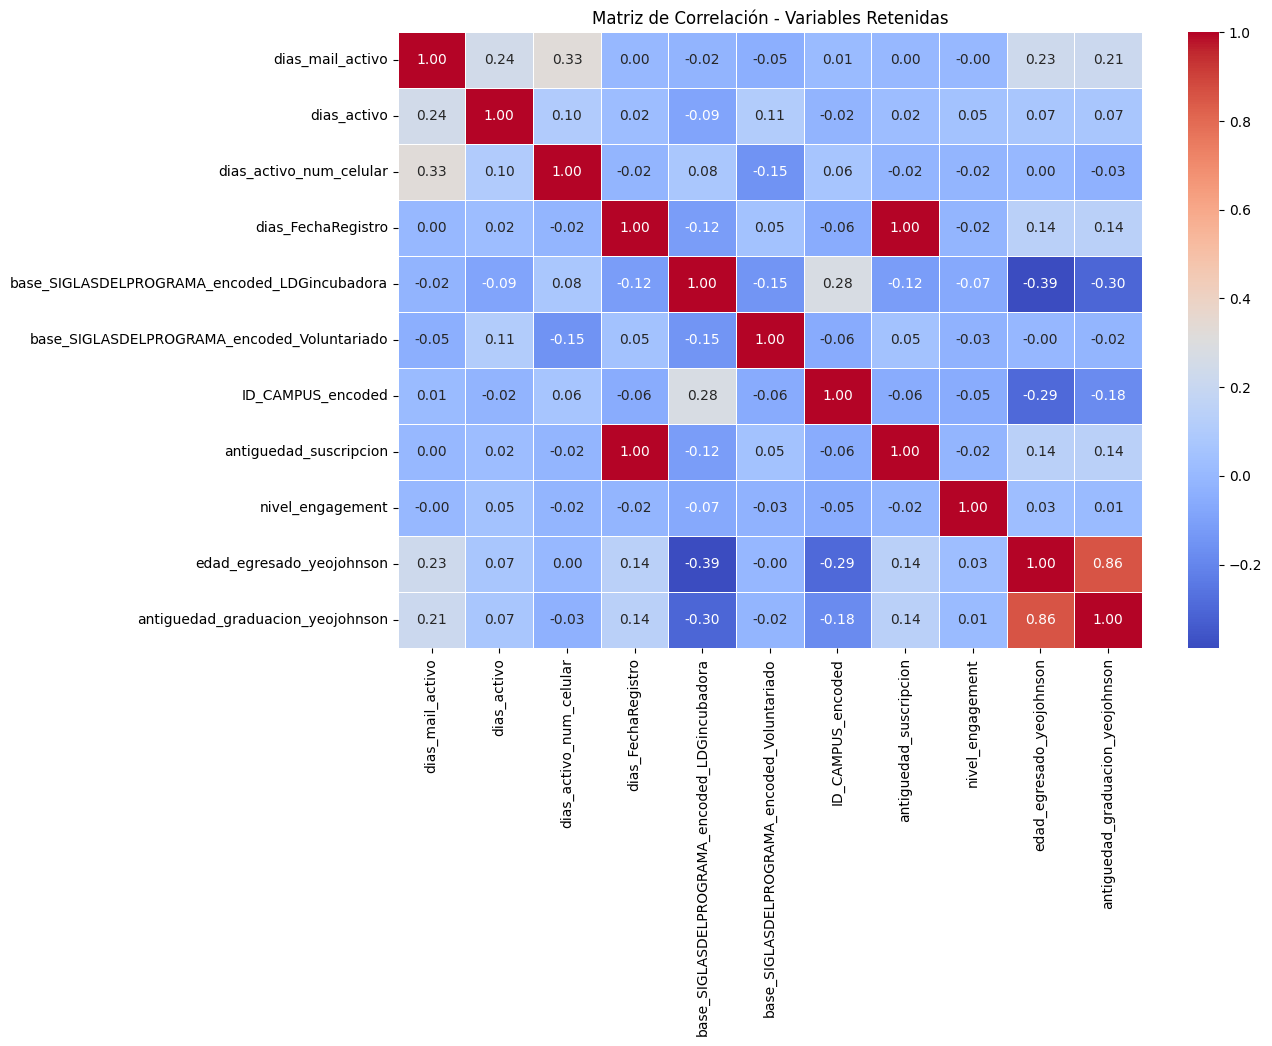

In [ ]:
# Verificar las columnas que sí están en el DataFrame
columns_retained_valid = [col for col in columns_retained if col in df_unidoLDG_numeric.columns]

# Calcular la matriz de correlación con las columnas válidas
correlation_matrix = df_unidoLDG_numeric[columns_retained_valid].corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Variables Retenidas')
plt.show()


###Conclusiones:

**Eliminar Redundancia:**
Debido a la alta correlación entre edad_egresado_yeojohnson y antiguedad_graduacion_yeojohnson (0.86), es recomendable eliminar una de estas dos variables para evitar duplicidad de información. La elección de cuál eliminar dependerá de cuál tenga mayor relevancia o interpretable en el contexto del modelo.

**Conservar las Otras Variables:**
Las demás variables tienen correlaciones bajas entre sí, lo cual indica que aportan información única y no son redundantes. Por lo tanto, no es necesario eliminar o combinar otras variables.

In [ ]:
# Eliminar la columna 'edad_egresado_yeojohnson' del DataFrame
df_unidoLDG_numeric.drop(columns=['edad_egresado_yeojohnson'], inplace=True)

# Verificar que la columna se haya eliminado
display("Columnas después de eliminar 'edad_egresado_yeojohnson':")
display(df_unidoLDG_numeric.columns)

##JUSTIFICAR POR QUÉ SE USÓ ANÁLISIS FACTORIAL
El análisis factorial fue la opción más viable para nuestro modelo debido a las características y necesidades específicas de los datos y el objetivo del proyecto.
### 1. **Reducción de Dimensionalidad Manteniendo Información Esencial**
   - Nuestro conjunto de datos contenía múltiples variables, algunas de las cuales eran redundantes o contenían información correlacionada. En lugar de utilizar todas las variables, el análisis factorial permitió reducir la dimensionalidad del conjunto de datos, combinando variables en factores que explican la mayor parte de la variabilidad subyacente en los datos.
   - A través de esta técnica, logramos identificar un conjunto más pequeño de factores principales que mantienen la esencia y variabilidad de los datos originales, lo cual hace el modelo más manejable y eficiente.

### 2. **Identificación de Variables Relevantes y Eliminación de Redundancia**
   - Una ventaja importante del análisis factorial es su capacidad para identificar patrones y relaciones entre variables. Gracias a esta técnica, pudimos agrupar variables correlacionadas en factores comunes, lo cual nos permitió distinguir cuáles variables aportan información única y cuáles son redundantes.
   - Al centrarnos en los factores que explican la mayor proporción de la varianza, logramos reducir el ruido en el modelo eliminando las variables menos relevantes, lo que mejora la interpretación y precisión del modelo.

### 3. **Simplificación y Mejora en la Interpretación**
   - La creación de factores a partir de variables originales simplifica la estructura de los datos, ya que en lugar de interpretar múltiples variables individuales, el modelo puede ahora basarse en un conjunto reducido de factores significativos.
   - Esta simplificación también hace que el modelo sea más fácil de comunicar y entender, ya que cada factor agrupa varias características relacionadas bajo un mismo concepto, proporcionando insights más claros y concisos.



In [ ]:
 df_unidoLDG_numeric['es_LDGincubadora'].unique()
 # Reemplazar los NaN por "0" en todo el DataFrame
 df_unidoLDG_numeric['es_LDGincubadora'].fillna(0, inplace=True)

In [ ]:
# Asegurarse de que las columnas numéricas definidas existan en el DataFrame
"""#columnas_numéricas = ['opened', 'clicked', 'correo de marketing ID', 'tiene_numero_celular',
                      'tiene_linkedin', 'HizoPrepaTec', 'antiguedad_suscripcion',
                      'edad_egresado', 'antiguedad_graduacion', 'nivel_engagement']"""

columnas_numericas = df_unidoLDG_numeric.columns

# Filtrar solo las columnas numéricas que existen en el DataFrame
columns_available = [col for col in columnas_numericas if col in df_unidoLDG_numeric.columns]


In [ ]:
import pandas as pd

def check_for_nan(df):
  """
  Checks for NaN values in a pandas DataFrame.

  Args:
    df: The pandas DataFrame to check.

  Returns:
    A boolean value indicating whether the DataFrame contains NaN values, and a DataFrame with the count of NaN values per column.
  """
  has_nan = df.isnull().values.any()
  nan_counts = df.isnull().sum()
  return has_nan, nan_counts

# Assuming 'df_unidoLDG' is your DataFrame
has_nan, nan_counts = check_for_nan(df_unidoLDG_numeric)

if has_nan:
  display("The DataFrame contains NaN values.")
  display("NaN count per column:")
  display(nan_counts)
else:
  display("The DataFrame does not contain NaN values.")

'The DataFrame does not contain NaN values.'

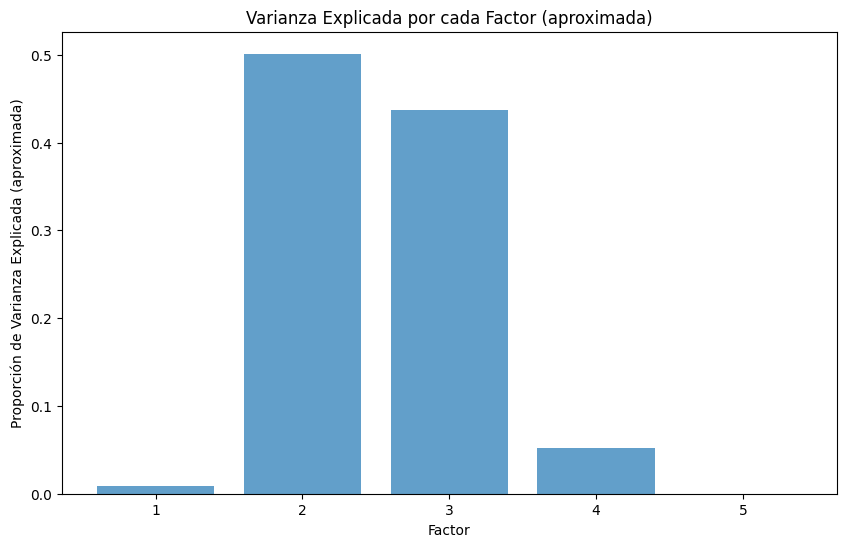

,Factor1,Factor2,Factor3,Factor4,Factor5
0,5.081238,2.759440,1.572507,6.183687,-0.881423
1,5.081238,2.759440,1.572507,6.183687,-0.881423
2,-0.198942,1.836409,-0.114735,1.892072,1.645503
3,-0.198942,1.836409,-0.114735,1.892072,1.645503
4,-0.198942,1.836409,-0.114735,1.892072,1.645503


In [ ]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filtrar las variables numéricas seleccionadas del DataFrame
X = df_unidoLDG_numeric[columns_available].select_dtypes(include=['number'])

# Asegurarse de que no haya NaNs o infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Aplicar Factor Analysis y ajustar los datos
fa = FactorAnalysis(n_components=min(5, X.shape[1]), rotation="varimax")  # Ajustar a menos componentes si hay pocas columnas
X_fa = fa.fit_transform(X)

# Obtener la varianza explicada por cada factor
# (No hay una forma directa de obtener la varianza explicada en FactorAnalysis)
# Se puede aproximar utilizando la suma de los cuadrados de las cargas factoriales
explained_variance_ratio_ = np.sum(fa.components_**2, axis=1) / np.sum(fa.components_**2)

# Visualizar la varianza explicada por cada factor
plt.figure(figsize=(10, 6))
# Use fa.n_components instead of fa.n_components_
plt.bar(range(1, fa.n_components + 1), explained_variance_ratio_, alpha=0.7, align='center')
plt.ylabel('Proporción de Varianza Explicada (aproximada)')
plt.xlabel('Factor')
plt.title('Varianza Explicada por cada Factor (aproximada)')
plt.show()

# Crear un DataFrame con los nuevos factores
df_fa = pd.DataFrame(X_fa, columns=[f'Factor{i+1}' for i in range(X_fa.shape[1])])

# Mostrar las primeras filas del DataFrame resultante
display(df_fa.head())

In [ ]:
 df_unidoLDG_numeric['es_LDGincubadora'].unique()

array([0, 1])

#Conclusiones

**Priorizar Factores 2 y 3:**

Dado que los factores 2 y 3 explican la mayor parte de la varianza, considera usar las variables que tengan una carga alta en estos factores. Estas variables serán las que contribuyen más significativamente a la variabilidad del modelo.

**Descartar o Minimizar la Importancia de Factores 1, 4 y 5:**

Los factores 1, 4, y 5 tienen una contribución baja en términos de varianza explicada, por lo que las variables que cargan en estos factores podrían considerarse menos importantes. Esto simplificaría el modelo y reduciría el ruido.

**Seleccionar Variables Basadas en Cargas Factoriales:**

La siguiente etapa sería revisar las cargas factoriales de las variables en los factores 2 y 3. Las variables con cargas altas en estos factores deberían priorizarse, mientras que las que carguen principalmente en factores de baja varianza explicada (como el factor 1) podrían considerarse redundantes.

Durante la preparación de los datos, se aplicaron técnicas de ingeniería de características para asegurar la calidad del modelo. La selección de variables mediante umbral de varianza y análisis factorial simplificó el conjunto de datos. La normalización y transformación de datos aseguraron una mejor convergencia de los algoritmos. Estas decisiones alinean nuestra preparación de datos con la metodología CRISP-ML, asegurando que los datos estén listos para la fase de modelado y que respondan a las necesidades estratégicas del negocio.

In [ ]:
# Forzar la recolección de basura
gc.collect()

17516

###Unimos las variables númericas con categoricas posterior al Análisis factorial

In [ ]:
df_unidoLDG_numeric

,dias_mail_activo,dias_activo,dias_activo_num_celular,dias_FechaRegistro,base_SIGLASDELPROGRAMA_encoded_LDGincubadora,base_SIGLASDELPROGRAMA_encoded_Voluntariado,ID_CAMPUS_encoded,antiguedad_suscripcion,nivel_engagement,edad_egresado_yeojohnson,antiguedad_graduacion_yeojohnson,es_Voluntariado,es_HistoriaExito,es_LDGincubadora
0,6954.0,10578.0,6954.0,104.0,0.294670,2.078445e-01,4.0,149.0,1.724138,3.146817,3.767040,0,0,0
1,6954.0,10578.0,6954.0,104.0,0.294670,2.078445e-01,4.0,149.0,1.724138,3.146817,3.767040,0,0,0
2,2555.0,7864.0,2555.0,1470.0,0.028644,3.302443e-02,26.0,1515.0,1.724138,3.146817,2.783960,0,0,0
3,2555.0,7864.0,2555.0,1470.0,0.028644,3.302443e-02,26.0,1515.0,1.724138,3.146817,2.783960,0,0,0
4,2555.0,7864.0,2555.0,1470.0,0.028644,3.302443e-02,26.0,1515.0,1.724138,3.146817,2.783960,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71180,73.0,437.0,514.0,3.0,0.025641,3.642069e-09,28.0,42.0,3.448276,-2.512886,-2.221681,0,0,0
71181,73.0,437.0,514.0,3.0,0.025641,3.642069e-09,28.0,42.0,6.896552,-2.512886,-2.221681,0,0,0
71182,73.0,437.0,514.0,3.0,0.025641,3.642069e-09,28.0,42.0,1.724138,-2.512886,-2.221681,0,0,0
71183,73.0,437.0,514.0,3.0,0.025641,3.642069e-09,28.0,42.0,3.448276,-2.512886,-2.221681,0,0,0


In [ ]:
df_unidoLDG

,categoria_dominio_correo_Educativo,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_SEXO_Femenino,base_SEXO_Masculino,base_Tipo Escuela_Arquitectura y Diseño,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_IDCAMPUS_,base_IDCAMPUS_1,base_IDCAMPUS_2,base_IDCAMPUS_8,base_IDCAMPUS_A,base_IDCAMPUS_A1,base_IDCAMPUS_AA,base_IDCAMPUS_C,base_IDCAMPUS_D,base_IDCAMPUS_E,base_IDCAMPUS_F,base_IDCAMPUS_G,base_IDCAMPUS_G1,base_IDCAMPUS_GA,base_IDCAMPUS_GQ,base_IDCAMPUS_GS,base_IDCAMPUS_H,base_IDCAMPUS_I,base_IDCAMPUS_J,base_IDCAMPUS_K,base_IDCAMPUS_L,base_IDCAMPUS_M,base_IDCAMPUS_N,base_IDCAMPUS_O,base_IDCAMPUS_P,base_IDCAMPUS_PUE,base_IDCAMPUS_Q,base_IDCAMPUS_R,base_IDCAMPUS_S,base_IDCAMPUS_T,base_IDCAMPUS_U,base_IDCAMPUS_W,base_IDCAMPUS_X,base_IDCAMPUS_Y,base_IDCAMPUS_Z,base_campusoperación_Aguascalientes,base_campusoperación_Chiapas,base_campusoperación_Chihuahua,base_campusoperación_Ciudad Juárez,base_campusoperación_Ciudad Obregón,base_campusoperación_Ciudad de México,base_campusoperación_Cuernavaca,base_campusoperación_EGADE,base_campusoperación_Escuela de Gobierno y Transformación Pública,base_campusoperación_Estado de México,base_campusoperación_Guadalajara,base_campusoperación_Guaymas,base_campusoperación_Hidalgo,base_campusoperación_Irapuato,base_campusoperación_Laguna,base_campusoperación_León,base_campusoperación_Mazatlán,base_campusoperación_Monterrey,base_campusoperación_Morelia,base_campusoperación_Programas en Línea,base_campusoperación_Puebla,base_campusoperación_Querétaro,base_campusoperación_Saltillo,base_campusoperación_San Luis Potosí,base_campusoperación_Santa Fe,base_campusoperación_Sede EGADE Monterrey,base_campusoperación_Sinaloa,base_campusoperación_Sonora Norte,base_campusoperación_Tampico,base_campusoperación_Toluca,base_campusoperación_Veracruz,base_campusoperación_Zacatecas,base_GIROEMPRESA_,base_GIROEMPRESA_Administración,base_GIROEMPRESA_Administración de Proyectos,base_GIROEMPRESA_Agrícola,base_GIROEMPRESA_Alimentos (Comercializador),base_GIROEMPRESA_Alimentos (Productos/Procesamiento),base_GIROEMPRESA_Artesanal,base_GIROEMPRESA_Aseguradora,base_GIROEMPRESA_Automotriz,base_GIROEMPRESA_Bienes Raíces,base_GIROEMPRESA_Boutiques,base_GIROEMPRESA_Comercializadora,base_GIROEMPRESA_Comunicación,base_GIROEMPRESA_Construcción,base_GIROEMPRESA_Consultoría,base_GIROEMPRESA_Contabilidad,base_GIROEMPRESA_Cómputo (Consultoría / Capacitación),base_GIROEMPRESA_Cómputo (Desarrollo de software),"base_GIROEMPRESA_Cómputo (Manufactura, Hardware)",base_GIROEMPRESA_De Servicios,base_GIROEMPRESA_Decoración,base_GIROEMPRESA_Dirección,base_GIROEMPRESA_Diseño Grafico,base_GIROEMPRESA_Editoriales,base_GIROEMPRESA_Educación,base_GIROEMPRESA_Entretenimiento,base_GIROEMPRESA_Estética / Productos de Belleza / Perfumería,base_GIROEMPRESA_Explotación de Recursos Naturales,base_GIROEMPRESA_Farmacéutica,base_GIROEMPRESA_Financiera,base_GIROEMPRESA_Finanzas,base_GIROEMPRESA_Ganadería / Caza,"base_GIROEMPRESA_Gobierno (Federal, Estatal y Municipal)",base_GIROEMPRESA_Hoteleria y turismo,base_GIROEMPRESA_Imprenta,base_GIROEMPRESA_Industrias Diversas,base_GIROEMPRESA_Información,base_GIROEMPRESA_Innovación,base_GIROEMPRESA_Investigación,base_GIROEMPRESA_Logística,base_GIROEMPRESA_Manufacturera/ Maquiladora,base_GIROEMPRESA_Medicina / Salud,base_GIROEMPRESA_Medios de Comunicación,base_GIROEMPRESA_Mercadotecnia,base_GIROEMPRESA_Metal Mecánico,base_GIROEMPRESA_Minería / Extracción,base_GIROEMPRESA_Mueblero,base_GIROEMPRESA_No aplica,base_GIROEMPRESA_Otro,base_GIROEMPRESA_Plástico / Hule,base_GIROEMPRESA_Producción y operaciones,base_GIROEMPRESA_Publicidad,base_GIROEMPRESA_Químico,base_GIROEMPRESA_Recursos humanos,base_GIROEMPRESA_Relaciones Públicas,base_GIROEMPRESA_Responsabilidad Social,base_GIROEMPRESA_Restaurante / Bar,base_GIROEMPRESA_Seguros,base_GIROEMPRESA_Servi

In [ ]:
# Suponiendo que df_unido_numeric contiene solo columnas numéricas y df_unido contiene el resto

# Combinar los dos DataFrames
df_unido = pd.concat([df_unidoLDG, df_unidoLDG_numeric], axis=1)

In [ ]:
df_unidoLDG = df_unido

In [ ]:
df_unidoLDG

,categoria_dominio_correo_Educativo,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_SEXO_Femenino,base_SEXO_Masculino,base_Tipo Escuela_Arquitectura y Diseño,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_IDCAMPUS_,base_IDCAMPUS_1,base_IDCAMPUS_2,base_IDCAMPUS_8,base_IDCAMPUS_A,base_IDCAMPUS_A1,base_IDCAMPUS_AA,base_IDCAMPUS_C,base_IDCAMPUS_D,base_IDCAMPUS_E,base_IDCAMPUS_F,base_IDCAMPUS_G,base_IDCAMPUS_G1,base_IDCAMPUS_GA,base_IDCAMPUS_GQ,base_IDCAMPUS_GS,base_IDCAMPUS_H,base_IDCAMPUS_I,base_IDCAMPUS_J,base_IDCAMPUS_K,base_IDCAMPUS_L,base_IDCAMPUS_M,base_IDCAMPUS_N,base_IDCAMPUS_O,base_IDCAMPUS_P,base_IDCAMPUS_PUE,base_IDCAMPUS_Q,base_IDCAMPUS_R,base_IDCAMPUS_S,base_IDCAMPUS_T,base_IDCAMPUS_U,base_IDCAMPUS_W,base_IDCAMPUS_X,base_IDCAMPUS_Y,base_IDCAMPUS_Z,base_campusoperación_Aguascalientes,base_campusoperación_Chiapas,base_campusoperación_Chihuahua,base_campusoperación_Ciudad Juárez,base_campusoperación_Ciudad Obregón,base_campusoperación_Ciudad de México,base_campusoperación_Cuernavaca,base_campusoperación_EGADE,base_campusoperación_Escuela de Gobierno y Transformación Pública,base_campusoperación_Estado de México,base_campusoperación_Guadalajara,base_campusoperación_Guaymas,base_campusoperación_Hidalgo,base_campusoperación_Irapuato,base_campusoperación_Laguna,base_campusoperación_León,base_campusoperación_Mazatlán,base_campusoperación_Monterrey,base_campusoperación_Morelia,base_campusoperación_Programas en Línea,base_campusoperación_Puebla,base_campusoperación_Querétaro,base_campusoperación_Saltillo,base_campusoperación_San Luis Potosí,base_campusoperación_Santa Fe,base_campusoperación_Sede EGADE Monterrey,base_campusoperación_Sinaloa,base_campusoperación_Sonora Norte,base_campusoperación_Tampico,base_campusoperación_Toluca,base_campusoperación_Veracruz,base_campusoperación_Zacatecas,base_GIROEMPRESA_,base_GIROEMPRESA_Administración,base_GIROEMPRESA_Administración de Proyectos,base_GIROEMPRESA_Agrícola,base_GIROEMPRESA_Alimentos (Comercializador),base_GIROEMPRESA_Alimentos (Productos/Procesamiento),base_GIROEMPRESA_Artesanal,base_GIROEMPRESA_Aseguradora,base_GIROEMPRESA_Automotriz,base_GIROEMPRESA_Bienes Raíces,base_GIROEMPRESA_Boutiques,base_GIROEMPRESA_Comercializadora,base_GIROEMPRESA_Comunicación,base_GIROEMPRESA_Construcción,base_GIROEMPRESA_Consultoría,base_GIROEMPRESA_Contabilidad,base_GIROEMPRESA_Cómputo (Consultoría / Capacitación),base_GIROEMPRESA_Cómputo (Desarrollo de software),"base_GIROEMPRESA_Cómputo (Manufactura, Hardware)",base_GIROEMPRESA_De Servicios,base_GIROEMPRESA_Decoración,base_GIROEMPRESA_Dirección,base_GIROEMPRESA_Diseño Grafico,base_GIROEMPRESA_Editoriales,base_GIROEMPRESA_Educación,base_GIROEMPRESA_Entretenimiento,base_GIROEMPRESA_Estética / Productos de Belleza / Perfumería,base_GIROEMPRESA_Explotación de Recursos Naturales,base_GIROEMPRESA_Farmacéutica,base_GIROEMPRESA_Financiera,base_GIROEMPRESA_Finanzas,base_GIROEMPRESA_Ganadería / Caza,"base_GIROEMPRESA_Gobierno (Federal, Estatal y Municipal)",base_GIROEMPRESA_Hoteleria y turismo,base_GIROEMPRESA_Imprenta,base_GIROEMPRESA_Industrias Diversas,base_GIROEMPRESA_Información,base_GIROEMPRESA_Innovación,base_GIROEMPRESA_Investigación,base_GIROEMPRESA_Logística,base_GIROEMPRESA_Manufacturera/ Maquiladora,base_GIROEMPRESA_Medicina / Salud,base_GIROEMPRESA_Medios de Comunicación,base_GIROEMPRESA_Mercadotecnia,base_GIROEMPRESA_Metal Mecánico,base_GIROEMPRESA_Minería / Extracción,base_GIROEMPRESA_Mueblero,base_GIROEMPRESA_No aplica,base_GIROEMPRESA_Otro,base_GIROEMPRESA_Plástico / Hule,base_GIROEMPRESA_Producción y operaciones,base_GIROEMPRESA_Publicidad,base_GIROEMPRESA_Químico,base_GIROEMPRESA_Recursos humanos,base_GIROEMPRESA_Relaciones Públicas,base_GIROEMPRESA_Responsabilidad Social,base_GIROEMPRESA_Restaurante / Bar,base_GIROEMPRESA_Seguros,base_GIROEMPRESA_Servi

##Balanceo de clases

In [ ]:
# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nan = df_unidoLDG.isna().mean() * 100

# Filtrar solo las columnas que tienen al menos un valor NaN
columnas_con_nan = porcentaje_nan[porcentaje_nan > 0]

# Mostrar las columnas con su porcentaje de valores NaN
display("Columnas con valores NaN y porcentaje correspondiente:")
display(columnas_con_nan)


'Columnas con valores NaN y porcentaje correspondiente:'

,0


In [ ]:


df_unidoLDG_numeric['antiguedad_suscripcion'].fillna(df_unidoLDG['antiguedad_suscripcion'].mean(), inplace=True)

# Verificar si aún quedan NaNs
porcentaje_nan_final = df_unidoLDG.isna().mean() * 100
columnas_con_nan_final = porcentaje_nan_final[porcentaje_nan_final > 0]

# Mostrar las columnas con valores NaN después de la segunda imputación
display("Columnas con valores NaN después de la segunda imputación:")
display(columnas_con_nan_final)


'Columnas con valores NaN después de la segunda imputación:'

,0


##Revisar balanceo de clases

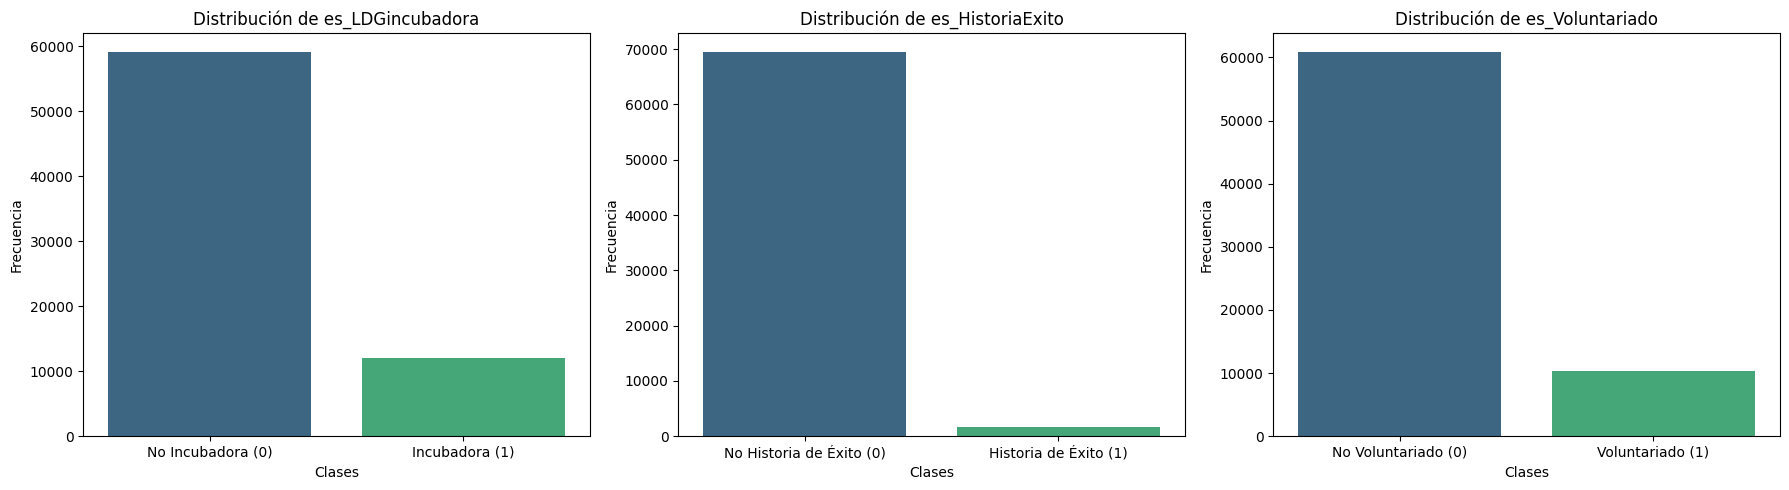

'\nProporciones para es_LDGincubadora:'

'Proporción de clase 0: 83.06%'

'Proporción de clase 1: 16.94%'

'\nProporciones para es_HistoriaExito:'

'Proporción de clase 0: 97.59%'

'Proporción de clase 1: 2.41%'

'\nProporciones para es_Voluntariado:'

'Proporción de clase 0: 85.50%'

'Proporción de clase 1: 14.50%'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables para las que se crearán subplots
variables = ['es_LDGincubadora', 'es_HistoriaExito', 'es_Voluntariado']

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 fila, 3 columnas

# Iterar sobre las variables y crear un subplot para cada una
for i, var in enumerate(variables):
    # Conteo de las clases
    class_counts = df_unidoLDG[var].value_counts()

    # Visualización del desequilibrio
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel('Clases')
    axes[i].set_ylabel('Frecuencia')

    # Etiquetas del eje x (personalizadas para cada variable)
    if var == 'es_LDGincubadora':
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No Incubadora (0)', 'Incubadora (1)'])
    elif var == 'es_HistoriaExito':
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
    elif var == 'es_Voluntariado':
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No Voluntariado (0)', 'Voluntariado (1)'])

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

# Imprimir proporciones para cada variable
for var in variables:
    display(f"\nProporciones para {var}:")
    class_counts = df_unidoLDG[var].value_counts()
    total = sum(class_counts)
    for clase in class_counts.index:
        proporcion = class_counts[clase] / total * 100
        display(f"Proporción de clase {clase}: {proporcion:.2f}%")

##Inicia técnicas de balanceo

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Crear una columna combinada para las tres variables objetivo
df_unidoLDG['combined_target'] = (
    df_unidoLDG['es_HistoriaExito'].astype(str) +
    '-' + df_unidoLDG['es_LDGincubadora'].astype(str) +
    '-' + df_unidoLDG['es_Voluntariado'].astype(str)
)

# Determinar el número máximo de muestras para balancear cada combinación
combinacion_counts = df_unidoLDG['combined_target'].value_counts()
n_samples = combinacion_counts.max()

# Crear un DataFrame vacío para almacenar el DataFrame balanceado
df_balanced = pd.DataFrame()

# Aplicar sobremuestreo para balancear cada combinación
for combinacion, count in combinacion_counts.items():
    subset = df_unidoLDG[df_unidoLDG['combined_target'] == combinacion]

    # Sobremuestrear si la combinación tiene menos muestras que el máximo
    if count < n_samples:
        subset_resampled = resample(subset, replace=True, n_samples=n_samples, random_state=42)
    else:
        subset_resampled = subset  # Si ya tiene el máximo, no se modifica

    df_balanced = pd.concat([df_balanced, subset_resampled])

# Separar las variables objetivo originales y eliminar la columna combinada
df_balanced[['es_HistoriaExito', 'es_LDGincubadora', 'es_Voluntariado']] = (
    df_balanced['combined_target'].str.split('-', expand=True).astype(int)
)
df_balanced.drop(columns=['combined_target'], inplace=True)

# Verificar la distribución de cada variable después del balanceo
display("Distribución de 'es_HistoriaExito':")
display(df_balanced['es_HistoriaExito'].value_counts(normalize=True) * 100)

display("\nDistribución de 'es_LDGincubadora':")
display(df_balanced['es_LDGincubadora'].value_counts(normalize=True) * 100)

display("\nDistribución de 'es_Voluntariado':")
display(df_balanced['es_Voluntariado'].value_counts(normalize=True) * 100)


"Distribución de 'es_HistoriaExito':"

,proportion
es_HistoriaExito,
0,57.142857
1,42.857143


"\nDistribución de 'es_LDGincubadora':"

,proportion
es_LDGincubadora,
0,57.142857
1,42.857143


"\nDistribución de 'es_Voluntariado':"

,proportion
es_Voluntariado,
0,57.142857
1,42.857143


In [ ]:
df_unidoLDG = df_balanced

##Mostramos después de balancear clases

'\nProporciones para es_Voluntariado:'

'Clase 0: 57.14%'

'Clase 1: 42.86%'

'\nProporciones para es_LDGincubadora:'

'Clase 0: 57.14%'

'Clase 1: 42.86%'

'\nProporciones para es_HistoriaExito:'

'Clase 0: 57.14%'

'Clase 1: 42.86%'

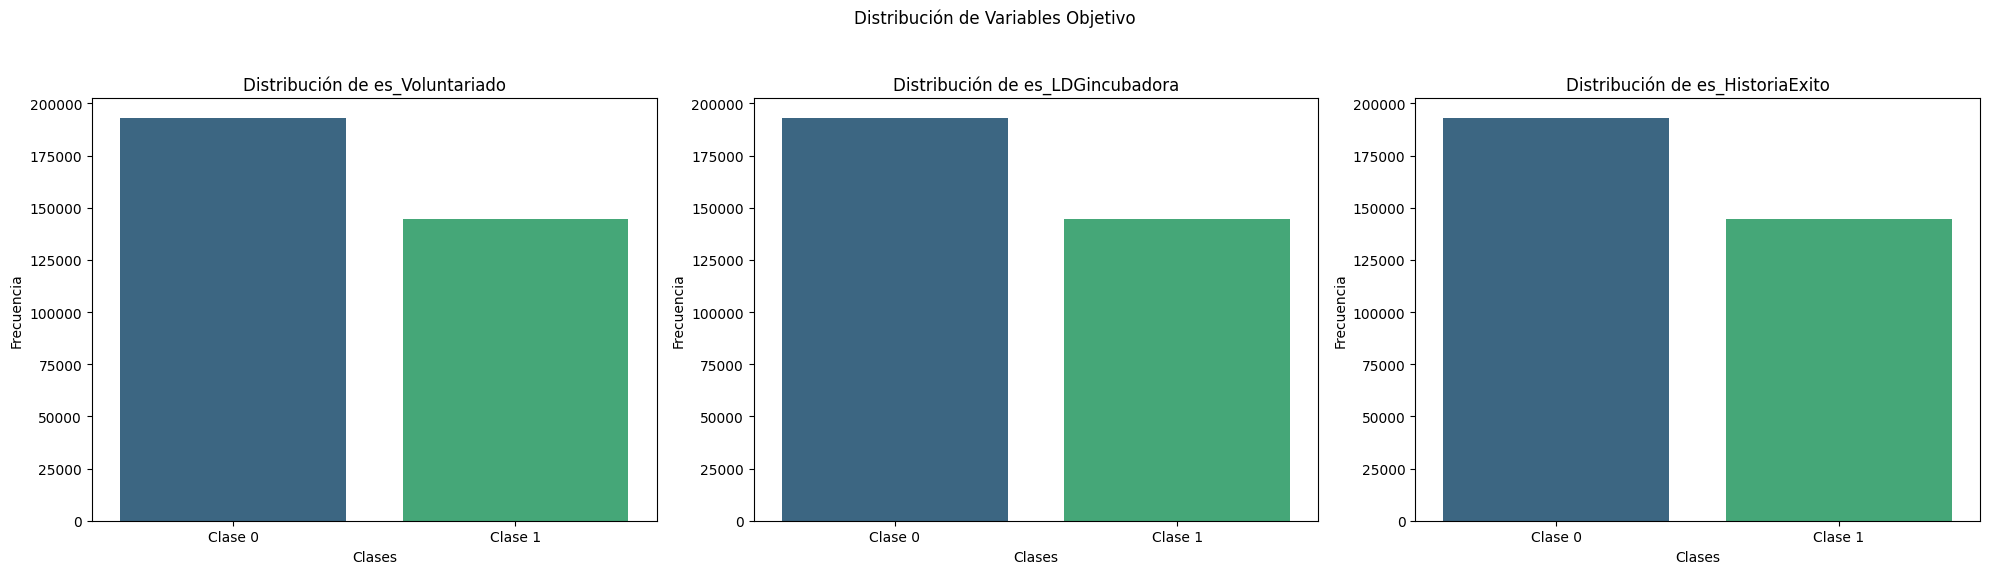

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la figura con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Distribución de Variables Objetivo")

# Definir una lista de variables objetivo y títulos para los gráficos
variables_objetivo = ['es_Voluntariado', 'es_LDGincubadora', 'es_HistoriaExito']
titulos = ['Distribución de es_Voluntariado', 'Distribución de es_LDGincubadora', 'Distribución de es_HistoriaExito']

# Iterar sobre las variables objetivo y crear subgráficos
for i, variable in enumerate(variables_objetivo):
    # Conteo de las clases
    class_counts = df_unidoLDG[variable].value_counts()

    # Visualización del desequilibrio
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[i])
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel('Clases')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Clase 0', 'Clase 1'])

    # Imprimir proporción de clases en el subgráfico
    total = sum(class_counts)
    proporcion_clase_0 = class_counts.get(0, 0) / total * 100
    proporcion_clase_1 = class_counts.get(1, 0) / total * 100
    display(f"\nProporciones para {variable}:")
    display(f"Clase 0: {proporcion_clase_0:.2f}%")
    display(f"Clase 1: {proporcion_clase_1:.2f}%")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar espacio para el título general
plt.show()


Guardamos el CSV nuevo para avance 3

In [ ]:
# Guardar el DataFrame df_unido en un archivo CSV

df_unidoLDG.to_csv(folder_path + 'bases/df_unido_limpioLGD_avance2_version2_3NOV_236PM.csv', index=False)

In [ ]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG.head())

,categoria_dominio_correo_Educativo,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_SEXO_Femenino,base_SEXO_Masculino,base_Tipo Escuela_Arquitectura y Diseño,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_IDCAMPUS_,base_IDCAMPUS_1,base_IDCAMPUS_2,base_IDCAMPUS_8,base_IDCAMPUS_A,base_IDCAMPUS_A1,base_IDCAMPUS_AA,base_IDCAMPUS_C,base_IDCAMPUS_D,base_IDCAMPUS_E,base_IDCAMPUS_F,base_IDCAMPUS_G,base_IDCAMPUS_G1,base_IDCAMPUS_GA,base_IDCAMPUS_GQ,base_IDCAMPUS_GS,base_IDCAMPUS_H,base_IDCAMPUS_I,base_IDCAMPUS_J,base_IDCAMPUS_K,base_IDCAMPUS_L,base_IDCAMPUS_M,base_IDCAMPUS_N,base_IDCAMPUS_O,base_IDCAMPUS_P,base_IDCAMPUS_PUE,base_IDCAMPUS_Q,base_IDCAMPUS_R,base_IDCAMPUS_S,base_IDCAMPUS_T,base_IDCAMPUS_U,base_IDCAMPUS_W,base_IDCAMPUS_X,base_IDCAMPUS_Y,base_IDCAMPUS_Z,base_campusoperación_Aguascalientes,base_campusoperación_Chiapas,base_campusoperación_Chihuahua,base_campusoperación_Ciudad Juárez,base_campusoperación_Ciudad Obregón,base_campusoperación_Ciudad de México,base_campusoperación_Cuernavaca,base_campusoperación_EGADE,base_campusoperación_Escuela de Gobierno y Transformación Pública,base_campusoperación_Estado de México,base_campusoperación_Guadalajara,base_campusoperación_Guaymas,base_campusoperación_Hidalgo,base_campusoperación_Irapuato,base_campusoperación_Laguna,base_campusoperación_León,base_campusoperación_Mazatlán,base_campusoperación_Monterrey,base_campusoperación_Morelia,base_campusoperación_Programas en Línea,base_campusoperación_Puebla,base_campusoperación_Querétaro,base_campusoperación_Saltillo,base_campusoperación_San Luis Potosí,base_campusoperación_Santa Fe,base_campusoperación_Sede EGADE Monterrey,base_campusoperación_Sinaloa,base_campusoperación_Sonora Norte,base_campusoperación_Tampico,base_campusoperación_Toluca,base_campusoperación_Veracruz,base_campusoperación_Zacatecas,base_GIROEMPRESA_,base_GIROEMPRESA_Administración,base_GIROEMPRESA_Administración de Proyectos,base_GIROEMPRESA_Agrícola,base_GIROEMPRESA_Alimentos (Comercializador),base_GIROEMPRESA_Alimentos (Productos/Procesamiento),base_GIROEMPRESA_Artesanal,base_GIROEMPRESA_Aseguradora,base_GIROEMPRESA_Automotriz,base_GIROEMPRESA_Bienes Raíces,base_GIROEMPRESA_Boutiques,base_GIROEMPRESA_Comercializadora,base_GIROEMPRESA_Comunicación,base_GIROEMPRESA_Construcción,base_GIROEMPRESA_Consultoría,base_GIROEMPRESA_Contabilidad,base_GIROEMPRESA_Cómputo (Consultoría / Capacitación),base_GIROEMPRESA_Cómputo (Desarrollo de software),"base_GIROEMPRESA_Cómputo (Manufactura, Hardware)",base_GIROEMPRESA_De Servicios,base_GIROEMPRESA_Decoración,base_GIROEMPRESA_Dirección,base_GIROEMPRESA_Diseño Grafico,base_GIROEMPRESA_Editoriales,base_GIROEMPRESA_Educación,base_GIROEMPRESA_Entretenimiento,base_GIROEMPRESA_Estética / Productos de Belleza / Perfumería,base_GIROEMPRESA_Explotación de Recursos Naturales,base_GIROEMPRESA_Farmacéutica,base_GIROEMPRESA_Financiera,base_GIROEMPRESA_Finanzas,base_GIROEMPRESA_Ganadería / Caza,"base_GIROEMPRESA_Gobierno (Federal, Estatal y Municipal)",base_GIROEMPRESA_Hoteleria y turismo,base_GIROEMPRESA_Imprenta,base_GIROEMPRESA_Industrias Diversas,base_GIROEMPRESA_Información,base_GIROEMPRESA_Innovación,base_GIROEMPRESA_Investigación,base_GIROEMPRESA_Logística,base_GIROEMPRESA_Manufacturera/ Maquiladora,base_GIROEMPRESA_Medicina / Salud,base_GIROEMPRESA_Medios de Comunicación,base_GIROEMPRESA_Mercadotecnia,base_GIROEMPRESA_Metal Mecánico,base_GIROEMPRESA_Minería / Extracción,base_GIROEMPRESA_Mueblero,base_GIROEMPRESA_No aplica,base_GIROEMPRESA_Otro,base_GIROEMPRESA_Plástico / Hule,base_GIROEMPRESA_Producción y operaciones,base_GIROEMPRESA_Publicidad,base_GIROEMPRESA_Químico,base_GIROEMPRESA_Recursos humanos,base_GIROEMPRESA_Relaciones Públicas,base_GIROEMPRESA_Responsabilidad Social,base_GIROEMPRESA_Restaurante / Bar,base_GIROEMPRESA_Seguros,base_GIROEMPRESA_Servi

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df'

# Método 1: Usando el atributo 'shape
num_columns = df_unidoLDG.shape[1]

# Método 2: Usando el atributo 'columns' y la función 'len'
num_columns = len(df_unidoLDG.columns)

# Mostrar el resultado
display(f"The DataFrame has {num_columns} columns.")

'The DataFrame has 326 columns.'